In [322]:
# ! pip install html_table_parser

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
import requests
from bs4 import BeautifulSoup
from html_table_parser import parser_functions
from selenium import webdriver

In [325]:
import re
import math
import datetime

In [326]:
df_sp1 = pd.read_csv('data_files/S&P 500 내역 (1).csv')
df_sp2 = pd.read_csv('data_files/S&P 500 내역 (2).csv')[:-1]

In [327]:
df_sp2

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 05월 05일,"4,152.38","4,255.50","4,256.39","4,105.51",-,-3.44%
1,2022년 05월 04일,"4,300.17","4,181.18","4,307.66","4,148.91",-,2.99%
2,2022년 05월 03일,"4,175.48","4,159.78","4,200.10","4,147.08",-,0.48%
3,2022년 05월 02일,"4,155.38","4,130.61","4,169.81","4,062.51",-,0.57%
4,2022년 04월 29일,"4,131.93","4,253.75","4,269.68","4,124.28",-,-3.63%
...,...,...,...,...,...,...,...
617,2019년 11월 21일,"3,103.54","3,108.49","3,110.11","3,094.55",-,-0.16%
618,2019년 11월 20일,"3,108.46","3,114.66","3,118.97","3,091.41",-,-0.38%
619,2019년 11월 19일,"3,120.18","3,127.45","3,127.64","3,113.47",-,-0.06%
620,2019년 11월 18일,"3,122.03","3,117.91","3,124.17","3,112.06",-,0.05%


In [328]:
df_sp = pd.concat([df_sp2, df_sp1])

In [329]:
# df_sp.to_csv('data_files/S&P500 데이터.csv')

In [330]:
df_sp = pd.read_csv('data_files/S&P500 데이터.csv', index_col='Unnamed: 0')

In [331]:
df_sp.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 05월 05일,"4,152.38","4,255.50","4,256.39","4,105.51",-,-3.44%
1,2022년 05월 04일,"4,300.17","4,181.18","4,307.66","4,148.91",-,2.99%
2,2022년 05월 03일,"4,175.48","4,159.78","4,200.10","4,147.08",-,0.48%
3,2022년 05월 02일,"4,155.38","4,130.61","4,169.81","4,062.51",-,0.57%
4,2022년 04월 29일,"4,131.93","4,253.75","4,269.68","4,124.28",-,-3.63%


In [332]:
df_mi10_1 = pd.read_csv('data_files/미국 10년물 국채 금리 채권 수익율 내역.csv')
df_mi10_2 = pd.read_csv('data_files/미국 10년물 국채 금리 채권 수익율 내역 (1).csv')

In [333]:
df_mi10 = pd.concat([df_mi10_2, df_mi10_1])

In [334]:
# df_mi10.to_csv('data_files/미국 10년 국채.csv')

In [335]:
df_mi10 = pd.read_csv('data_files/미국 10년 국채.csv', index_col='Unnamed: 0')
df_mi10.head()

,날짜,종가,오픈,고가,저가,변동 %
0,2022년 05월 06일,3.077,3.046,3.090,3.044,0.81%
1,2022년 05월 05일,3.052,2.964,3.102,2.933,3.60%
2,2022년 05월 04일,2.946,3.001,3.011,2.901,-0.97%
3,2022년 05월 03일,2.975,2.993,3.004,2.917,-0.06%
4,2022년 05월 02일,2.977,2.932,3.010,2.907,1.47%


In [336]:
df_gsci1 = pd.read_csv('data_files/S&P GSCI Commodity Total Return 내역.csv', index_col='날짜')
df_gsci2 = pd.read_csv('data_files/S&P GSCI Commodity Total Return 내역 (1).csv', index_col='날짜')

In [337]:
df_gsci = pd.concat([df_gsci2, df_gsci1])

In [338]:
# df_gsci.to_csv('data_files/S&P GSCI.csv')

In [339]:
df_gsci = pd.read_csv('data_files/S&P GSCI.csv')
df_gsci.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 05월 04일,"3,958.5029","3,837.0459","3,974.2603","3,837.0391",-,3.17%
1,2022년 05월 03일,"3,837.0591","3,903.1838","3,929.5400","3,828.2744",-,-1.69%
2,2022년 05월 02일,"3,903.0850","3,880.4614","3,912.5996","3,795.6445",-,0.52%
3,2022년 04월 29일,"3,882.9910","3,884.7021","3,947.7131","3,874.5657",-,-0.04%
4,2022년 04월 28일,"3,884.4270","3,844.6047","3,891.7925","3,809.6189",-,1.03%


In [340]:
res = requests.get('https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643')

In [341]:
soup = BeautifulSoup(res.text, 'html.parser')

In [342]:
data = soup.select('table')

In [343]:
table = parser_functions.make2d(data[0])

In [344]:
df_rate = pd.DataFrame(data=table[1:], columns=table[0])

In [345]:
df_rate

,변경일자,변경일자,기준금리
0,2022,04월 14일,1.50
1,2022,01월 14일,1.25
2,2021,11월 25일,1.00
3,2021,08월 26일,0.75
4,2020,05월 28일,0.50
5,2020,03월 17일,0.75
6,2019,10월 16일,1.25
7,2019,07월 18일,1.50
8,2018,11월 30일,1.75
9,2017,11월 30일,1.50


In [346]:
# df_rate.to_csv('data_files/연도별 금리.csv')

In [347]:
df_rate = pd.read_csv('data_files/연도별 금리.csv', index_col='Unnamed: 0')
df_rate.tail()

,변경일자,변경일자.1,기준금리
43,2001,08월 09일,4.50
44,2001,07월 05일,4.75
45,2001,02월 08일,5.00
46,2000,10월 05일,5.25
47,2000,02월 10일,5.00


In [348]:
df_sp = df_sp[['날짜', '종가']]

In [349]:
df_mi10 = df_mi10[['날짜', '종가']]

In [350]:
df_gsci = df_gsci[['날짜', '종가']]

In [351]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변경일자    48 non-null     int64  
 1   변경일자.1  48 non-null     object 
 2   기준금리    48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


In [352]:
df_rate['날짜'] = df_rate['변경일자'].astype('str') + df_rate['변경일자.1']

In [353]:
df_rate['날짜'] = df_rate['날짜'].apply(lambda x: re.sub(r'[^0-9]', '', x))

In [354]:
df_rate = df_rate[['날짜', '기준금리']]

In [355]:
df_rate['날짜'] = pd.to_datetime(df_rate['날짜'])

In [356]:
df_rate

,날짜,기준금리
0,2022-04-14,1.50
1,2022-01-14,1.25
2,2021-11-25,1.00
3,2021-08-26,0.75
4,2020-05-28,0.50
5,2020-03-17,0.75
6,2019-10-16,1.25
7,2019-07-18,1.50
8,2018-11-30,1.75
9,2017-11-30,1.50


In [357]:
df = pd.merge(df_sp, df_mi10, how='inner', on='날짜')

In [358]:
df = pd.merge(df, df_gsci, how='inner', on='날짜')

In [359]:
df['날짜'] = df['날짜'].apply(lambda x: re.sub(r'[^0-9]', '', x))

In [360]:
df['날짜'] = pd.to_datetime(df['날짜'])

In [361]:
df['날짜']

0      2022-05-04
1      2022-05-03
2      2022-05-02
3      2022-04-29
4      2022-04-28
          ...    
5611   2000-01-07
5612   2000-01-06
5613   2000-01-05
5614   2000-01-04
5615   2000-01-03
Name: 날짜, Length: 5616, dtype: datetime64[ns]

In [362]:
df_rate['날짜'].head()

0   2022-04-14
1   2022-01-14
2   2021-11-25
3   2021-08-26
4   2020-05-28
Name: 날짜, dtype: datetime64[ns]

In [363]:
date = df['날짜'][0]

In [364]:
from datetime import datetime

In [365]:
datetime.today().strftime("%Y-%m-%d")

'2022-05-17'

In [366]:
last_date = pd.to_datetime(datetime.today().strftime("%Y-%m-%d"))
for i in df_rate.T:
    current_date = df_rate.iloc[i]['날짜']
    if last_date > date >= current_date:
        print(current_date)
    last_date = df_rate.iloc[i]['날짜']

2022-04-14 00:00:00


In [367]:
df_rate.index[-1]

47

In [368]:
last_date = pd.to_datetime(datetime.today().strftime("%Y-%m-%d"))
rate_li = []
num = 0
for date in df['날짜']:
    rate_date = df_rate.iloc[num]['날짜']
    rate = df_rate.iloc[num]['기준금리']
    if date >= rate_date:
        print(date, rate)
        rate_li.append(rate)
    else:
        print(date)
        if num < df_rate.index[-1]:
            num += 1
        print(df_rate.iloc[num]['기준금리'])
        rate_li.append(df_rate.iloc[num]['기준금리'])
        

2022-05-04 00:00:00 1.5
2022-05-03 00:00:00 1.5
2022-05-02 00:00:00 1.5
2022-04-29 00:00:00 1.5
2022-04-28 00:00:00 1.5
2022-04-27 00:00:00 1.5
2022-04-26 00:00:00 1.5
2022-04-25 00:00:00 1.5
2022-04-22 00:00:00 1.5
2022-04-21 00:00:00 1.5
2022-04-20 00:00:00 1.5
2022-04-19 00:00:00 1.5
2022-04-18 00:00:00 1.5
2022-04-14 00:00:00 1.5
2022-04-13 00:00:00
1.25
2022-04-12 00:00:00 1.25
2022-04-11 00:00:00 1.25
2022-04-08 00:00:00 1.25
2022-04-07 00:00:00 1.25
2022-04-06 00:00:00 1.25
2022-04-05 00:00:00 1.25
2022-04-04 00:00:00 1.25
2022-04-01 00:00:00 1.25
2022-03-31 00:00:00 1.25
2022-03-30 00:00:00 1.25
2022-03-29 00:00:00 1.25
2022-03-28 00:00:00 1.25
2022-03-25 00:00:00 1.25
2022-03-24 00:00:00 1.25
2022-03-23 00:00:00 1.25
2022-03-22 00:00:00 1.25
2022-03-21 00:00:00 1.25
2022-03-18 00:00:00 1.25
2022-03-17 00:00:00 1.25
2022-03-16 00:00:00 1.25
2022-03-15 00:00:00 1.25
2022-03-14 00:00:00 1.25
2022-03-11 00:00:00 1.25
2022-03-10 00:00:00 1.25
2022-03-09 00:00:00 1.25
2022-03-08 00:

2020-03-26 00:00:00 0.75
2020-03-25 00:00:00 0.75
2020-03-24 00:00:00 0.75
2020-03-23 00:00:00 0.75
2020-03-20 00:00:00 0.75
2020-03-19 00:00:00 0.75
2020-03-18 00:00:00 0.75
2020-03-17 00:00:00 0.75
2020-03-16 00:00:00
1.25
2020-03-13 00:00:00 1.25
2020-03-12 00:00:00 1.25
2020-03-11 00:00:00 1.25
2020-03-10 00:00:00 1.25
2020-03-09 00:00:00 1.25
2020-03-06 00:00:00 1.25
2020-03-05 00:00:00 1.25
2020-03-04 00:00:00 1.25
2020-03-03 00:00:00 1.25
2020-03-02 00:00:00 1.25
2020-02-28 00:00:00 1.25
2020-02-27 00:00:00 1.25
2020-02-26 00:00:00 1.25
2020-02-25 00:00:00 1.25
2020-02-24 00:00:00 1.25
2020-02-21 00:00:00 1.25
2020-02-20 00:00:00 1.25
2020-02-19 00:00:00 1.25
2020-02-18 00:00:00 1.25
2020-02-14 00:00:00 1.25
2020-02-13 00:00:00 1.25
2020-02-12 00:00:00 1.25
2020-02-11 00:00:00 1.25
2020-02-10 00:00:00 1.25
2020-02-07 00:00:00 1.25
2020-02-06 00:00:00 1.25
2020-02-05 00:00:00 1.25
2020-02-04 00:00:00 1.25
2020-02-03 00:00:00 1.25
2020-01-31 00:00:00 1.25
2020-01-30 00:00:00 1.25


2017-10-16 00:00:00 1.25
2017-10-13 00:00:00 1.25
2017-10-12 00:00:00 1.25
2017-10-11 00:00:00 1.25
2017-10-10 00:00:00 1.25
2017-10-09 00:00:00 1.25
2017-10-06 00:00:00 1.25
2017-10-05 00:00:00 1.25
2017-10-04 00:00:00 1.25
2017-10-03 00:00:00 1.25
2017-10-02 00:00:00 1.25
2017-09-29 00:00:00 1.25
2017-09-28 00:00:00 1.25
2017-09-27 00:00:00 1.25
2017-09-26 00:00:00 1.25
2017-09-25 00:00:00 1.25
2017-09-22 00:00:00 1.25
2017-09-21 00:00:00 1.25
2017-09-20 00:00:00 1.25
2017-09-19 00:00:00 1.25
2017-09-18 00:00:00 1.25
2017-09-15 00:00:00 1.25
2017-09-14 00:00:00 1.25
2017-09-13 00:00:00 1.25
2017-09-12 00:00:00 1.25
2017-09-11 00:00:00 1.25
2017-09-08 00:00:00 1.25
2017-09-07 00:00:00 1.25
2017-09-06 00:00:00 1.25
2017-09-05 00:00:00 1.25
2017-09-01 00:00:00 1.25
2017-08-31 00:00:00 1.25
2017-08-30 00:00:00 1.25
2017-08-29 00:00:00 1.25
2017-08-28 00:00:00 1.25
2017-08-25 00:00:00 1.25
2017-08-24 00:00:00 1.25
2017-08-23 00:00:00 1.25
2017-08-22 00:00:00 1.25
2017-08-21 00:00:00 1.25


2.0
2015-03-10 00:00:00 2.0
2015-03-09 00:00:00 2.0
2015-03-06 00:00:00 2.0
2015-03-05 00:00:00 2.0
2015-03-04 00:00:00 2.0
2015-03-03 00:00:00 2.0
2015-03-02 00:00:00 2.0
2015-02-27 00:00:00 2.0
2015-02-26 00:00:00 2.0
2015-02-25 00:00:00 2.0
2015-02-24 00:00:00 2.0
2015-02-23 00:00:00 2.0
2015-02-20 00:00:00 2.0
2015-02-19 00:00:00 2.0
2015-02-18 00:00:00 2.0
2015-02-17 00:00:00 2.0
2015-02-13 00:00:00 2.0
2015-02-12 00:00:00 2.0
2015-02-11 00:00:00 2.0
2015-02-10 00:00:00 2.0
2015-02-09 00:00:00 2.0
2015-02-06 00:00:00 2.0
2015-02-05 00:00:00 2.0
2015-02-04 00:00:00 2.0
2015-02-03 00:00:00 2.0
2015-02-02 00:00:00 2.0
2015-01-30 00:00:00 2.0
2015-01-29 00:00:00 2.0
2015-01-28 00:00:00 2.0
2015-01-27 00:00:00 2.0
2015-01-26 00:00:00 2.0
2015-01-23 00:00:00 2.0
2015-01-22 00:00:00 2.0
2015-01-21 00:00:00 2.0
2015-01-20 00:00:00 2.0
2015-01-16 00:00:00 2.0
2015-01-15 00:00:00 2.0
2015-01-14 00:00:00 2.0
2015-01-13 00:00:00 2.0
2015-01-12 00:00:00 2.0
2015-01-09 00:00:00 2.0
2015-01-08 0

2012-04-18 00:00:00 3.25
2012-04-17 00:00:00 3.25
2012-04-16 00:00:00 3.25
2012-04-13 00:00:00 3.25
2012-04-12 00:00:00 3.25
2012-04-11 00:00:00 3.25
2012-04-10 00:00:00 3.25
2012-04-09 00:00:00 3.25
2012-04-05 00:00:00 3.25
2012-04-04 00:00:00 3.25
2012-04-03 00:00:00 3.25
2012-04-02 00:00:00 3.25
2012-03-30 00:00:00 3.25
2012-03-29 00:00:00 3.25
2012-03-28 00:00:00 3.25
2012-03-27 00:00:00 3.25
2012-03-26 00:00:00 3.25
2012-03-23 00:00:00 3.25
2012-03-22 00:00:00 3.25
2012-03-21 00:00:00 3.25
2012-03-20 00:00:00 3.25
2012-03-19 00:00:00 3.25
2012-03-16 00:00:00 3.25
2012-03-15 00:00:00 3.25
2012-03-14 00:00:00 3.25
2012-03-13 00:00:00 3.25
2012-03-12 00:00:00 3.25
2012-03-09 00:00:00 3.25
2012-03-08 00:00:00 3.25
2012-03-07 00:00:00 3.25
2012-03-06 00:00:00 3.25
2012-03-05 00:00:00 3.25
2012-03-02 00:00:00 3.25
2012-03-01 00:00:00 3.25
2012-02-29 00:00:00 3.25
2012-02-28 00:00:00 3.25
2012-02-27 00:00:00 3.25
2012-02-24 00:00:00 3.25
2012-02-23 00:00:00 3.25
2012-02-22 00:00:00 3.25


2009-08-13 00:00:00 2.0
2009-08-12 00:00:00 2.0
2009-08-11 00:00:00 2.0
2009-08-10 00:00:00 2.0
2009-08-07 00:00:00 2.0
2009-08-06 00:00:00 2.0
2009-08-05 00:00:00 2.0
2009-08-04 00:00:00 2.0
2009-08-03 00:00:00 2.0
2009-07-31 00:00:00 2.0
2009-07-30 00:00:00 2.0
2009-07-29 00:00:00 2.0
2009-07-28 00:00:00 2.0
2009-07-27 00:00:00 2.0
2009-07-24 00:00:00 2.0
2009-07-23 00:00:00 2.0
2009-07-22 00:00:00 2.0
2009-07-21 00:00:00 2.0
2009-07-20 00:00:00 2.0
2009-07-17 00:00:00 2.0
2009-07-16 00:00:00 2.0
2009-07-15 00:00:00 2.0
2009-07-14 00:00:00 2.0
2009-07-13 00:00:00 2.0
2009-07-10 00:00:00 2.0
2009-07-09 00:00:00 2.0
2009-07-08 00:00:00 2.0
2009-07-07 00:00:00 2.0
2009-07-06 00:00:00 2.0
2009-07-02 00:00:00 2.0
2009-07-01 00:00:00 2.0
2009-06-30 00:00:00 2.0
2009-06-29 00:00:00 2.0
2009-06-26 00:00:00 2.0
2009-06-25 00:00:00 2.0
2009-06-24 00:00:00 2.0
2009-06-23 00:00:00 2.0
2009-06-22 00:00:00 2.0
2009-06-19 00:00:00 2.0
2009-06-18 00:00:00 2.0
2009-06-17 00:00:00 2.0
2009-06-16 00:00

2006-12-14 00:00:00 4.5
2006-12-13 00:00:00 4.5
2006-12-12 00:00:00 4.5
2006-12-11 00:00:00 4.5
2006-12-08 00:00:00 4.5
2006-12-07 00:00:00 4.5
2006-12-06 00:00:00 4.5
2006-12-05 00:00:00 4.5
2006-12-04 00:00:00 4.5
2006-12-01 00:00:00 4.5
2006-11-30 00:00:00 4.5
2006-11-29 00:00:00 4.5
2006-11-28 00:00:00 4.5
2006-11-27 00:00:00 4.5
2006-11-24 00:00:00 4.5
2006-11-22 00:00:00 4.5
2006-11-21 00:00:00 4.5
2006-11-20 00:00:00 4.5
2006-11-17 00:00:00 4.5
2006-11-16 00:00:00 4.5
2006-11-15 00:00:00 4.5
2006-11-14 00:00:00 4.5
2006-11-13 00:00:00 4.5
2006-11-10 00:00:00 4.5
2006-11-09 00:00:00 4.5
2006-11-08 00:00:00 4.5
2006-11-07 00:00:00 4.5
2006-11-06 00:00:00 4.5
2006-11-03 00:00:00 4.5
2006-11-02 00:00:00 4.5
2006-11-01 00:00:00 4.5
2006-10-31 00:00:00 4.5
2006-10-30 00:00:00 4.5
2006-10-27 00:00:00 4.5
2006-10-26 00:00:00 4.5
2006-10-25 00:00:00 4.5
2006-10-24 00:00:00 4.5
2006-10-23 00:00:00 4.5
2006-10-20 00:00:00 4.5
2006-10-19 00:00:00 4.5
2006-10-18 00:00:00 4.5
2006-10-17 00:00

2004-03-23 00:00:00 3.75
2004-03-22 00:00:00 3.75
2004-03-19 00:00:00 3.75
2004-03-18 00:00:00 3.75
2004-03-17 00:00:00 3.75
2004-03-16 00:00:00 3.75
2004-03-15 00:00:00 3.75
2004-03-12 00:00:00 3.75
2004-03-11 00:00:00 3.75
2004-03-10 00:00:00 3.75
2004-03-09 00:00:00 3.75
2004-03-08 00:00:00 3.75
2004-03-05 00:00:00 3.75
2004-03-04 00:00:00 3.75
2004-03-03 00:00:00 3.75
2004-03-02 00:00:00 3.75
2004-03-01 00:00:00 3.75
2004-02-27 00:00:00 3.75
2004-02-26 00:00:00 3.75
2004-02-25 00:00:00 3.75
2004-02-24 00:00:00 3.75
2004-02-23 00:00:00 3.75
2004-02-20 00:00:00 3.75
2004-02-19 00:00:00 3.75
2004-02-18 00:00:00 3.75
2004-02-17 00:00:00 3.75
2004-02-13 00:00:00 3.75
2004-02-12 00:00:00 3.75
2004-02-11 00:00:00 3.75
2004-02-10 00:00:00 3.75
2004-02-09 00:00:00 3.75
2004-02-06 00:00:00 3.75
2004-02-05 00:00:00 3.75
2004-02-04 00:00:00 3.75
2004-02-03 00:00:00 3.75
2004-02-02 00:00:00 3.75
2004-01-30 00:00:00 3.75
2004-01-29 00:00:00 3.75
2004-01-28 00:00:00 3.75
2004-01-27 00:00:00 3.75


2001-06-18 00:00:00 5.0
2001-06-15 00:00:00 5.0
2001-06-14 00:00:00 5.0
2001-06-13 00:00:00 5.0
2001-06-12 00:00:00 5.0
2001-06-11 00:00:00 5.0
2001-06-08 00:00:00 5.0
2001-06-07 00:00:00 5.0
2001-06-06 00:00:00 5.0
2001-06-05 00:00:00 5.0
2001-06-04 00:00:00 5.0
2001-06-01 00:00:00 5.0
2001-05-31 00:00:00 5.0
2001-05-30 00:00:00 5.0
2001-05-29 00:00:00 5.0
2001-05-25 00:00:00 5.0
2001-05-24 00:00:00 5.0
2001-05-23 00:00:00 5.0
2001-05-22 00:00:00 5.0
2001-05-21 00:00:00 5.0
2001-05-18 00:00:00 5.0
2001-05-17 00:00:00 5.0
2001-05-16 00:00:00 5.0
2001-05-15 00:00:00 5.0
2001-05-14 00:00:00 5.0
2001-05-11 00:00:00 5.0
2001-05-10 00:00:00 5.0
2001-05-09 00:00:00 5.0
2001-05-08 00:00:00 5.0
2001-05-07 00:00:00 5.0
2001-05-04 00:00:00 5.0
2001-05-03 00:00:00 5.0
2001-05-02 00:00:00 5.0
2001-05-01 00:00:00 5.0
2001-04-30 00:00:00 5.0
2001-04-27 00:00:00 5.0
2001-04-26 00:00:00 5.0
2001-04-25 00:00:00 5.0
2001-04-24 00:00:00 5.0
2001-04-23 00:00:00 5.0
2001-04-20 00:00:00 5.0
2001-04-19 00:00

In [369]:
len(rate_li)

5616

In [370]:
df['기준금리'] = rate_li

In [371]:
df[df.날짜 == '2021-11-26']

,날짜,종가_x,종가_y,종가,기준금리
109,2021-11-26,"4,594.62",1.482,"2,665.2280",1.0


In [372]:
df_rate

,날짜,기준금리
0,2022-04-14,1.50
1,2022-01-14,1.25
2,2021-11-25,1.00
3,2021-08-26,0.75
4,2020-05-28,0.50
5,2020-03-17,0.75
6,2019-10-16,1.25
7,2019-07-18,1.50
8,2018-11-30,1.75
9,2017-11-30,1.50


In [373]:
df

,날짜,종가_x,종가_y,종가,기준금리
0,2022-05-04,"4,300.17",2.946,"3,958.5029",1.5
1,2022-05-03,"4,175.48",2.975,"3,837.0591",1.5
2,2022-05-02,"4,155.38",2.977,"3,903.0850",1.5
3,2022-04-29,"4,131.93",2.938,"3,882.9910",1.5
4,2022-04-28,"4,287.50",2.832,"3,884.4270",1.5
...,...,...,...,...,...
5611,2000-01-07,"1,441.50",6.513,"2,689.9790",5.0
5612,2000-01-06,"1,403.50",6.540,"2,713.8350",5.0
5613,2000-01-05,"1,402.10",6.599,"2,714.8110",5.0
5614,2000-01-04,"1,399.40",6.499,"2,740.7410",5.0


In [374]:
df['연도'] = df['날짜'].apply(lambda x: str(x)[:4])

In [375]:
df.columns = ['날짜', 'S&P500', '미국채10년', 'GSCI', '기준금리', '연도']

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5616 entries, 0 to 5615
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      5616 non-null   datetime64[ns]
 1   S&P500  5616 non-null   object        
 2   미국채10년  5616 non-null   float64       
 3   GSCI    5616 non-null   object        
 4   기준금리    5616 non-null   float64       
 5   연도      5616 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 436.2+ KB


In [377]:
df['S&P500'] = df['S&P500'].apply(lambda x: float(x.replace(",", "")))

In [378]:
df['GSCI'] = df['GSCI'].apply(lambda x: float(x.replace(",", "")))

In [379]:
df.set_index('날짜', inplace=True)

In [380]:
# df.to_csv('data_files/2000이후 데이터.csv')

In [381]:
df = pd.read_csv('data_files/2000이후 데이터.csv')

In [382]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,연도
0,2022-05-04,4300.17,2.946,3958.5029,1.5,2022
1,2022-05-03,4175.48,2.975,3837.0591,1.5,2022
2,2022-05-02,4155.38,2.977,3903.0850,1.5,2022
3,2022-04-29,4131.93,2.938,3882.9910,1.5,2022
4,2022-04-28,4287.50,2.832,3884.4270,1.5,2022
...,...,...,...,...,...,...
5611,2000-01-07,1441.50,6.513,2689.9790,5.0,2000
5612,2000-01-06,1403.50,6.540,2713.8350,5.0,2000
5613,2000-01-05,1402.10,6.599,2714.8110,5.0,2000
5614,2000-01-04,1399.40,6.499,2740.7410,5.0,2000


In [383]:
df_cpi = pd.read_csv('data_files/CPI.csv', index_col='DATE')

In [384]:
df_cpi = df_cpi.loc['2000-01-01':]

In [385]:
df_cpi.index

Index(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
       '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
       ...
       '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
       '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01'],
      dtype='object', name='DATE', length=267)

In [386]:
df_cpi.loc['2000-01-01']['CPIAUCSL']

169.3

In [387]:
year_li = pd.date_range(df_cpi.index[0], df_cpi.index[-1])

In [388]:
data_li = []
for year in year_li:
    if str(year)[:10] in df_cpi.index:
        data_li.append(df_cpi.loc[str(year)[:10]]['CPIAUCSL'])
    else:
        data_li.append(np.nan)

In [389]:
se_cpi_ext = pd.Series(index=year_li, data=data_li)

In [390]:
df_cpi_bo = pd.DataFrame(se_cpi_ext.interpolate())

In [391]:
df_cpi_bo.reset_index(inplace=True)

In [392]:
df_cpi_bo.columns = ['날짜', 'CPI']

In [393]:
df_cpi_bo['날짜'] = df_cpi_bo['날짜'].apply(lambda x : str(x)[:10])

In [394]:
df['날짜']

0       2022-05-04
1       2022-05-03
2       2022-05-02
3       2022-04-29
4       2022-04-28
           ...    
5611    2000-01-07
5612    2000-01-06
5613    2000-01-05
5614    2000-01-04
5615    2000-01-03
Name: 날짜, Length: 5616, dtype: object

In [395]:
df_cpi_bo['날짜']

0       2000-01-01
1       2000-01-02
2       2000-01-03
3       2000-01-04
4       2000-01-05
           ...    
8091    2022-02-25
8092    2022-02-26
8093    2022-02-27
8094    2022-02-28
8095    2022-03-01
Name: 날짜, Length: 8096, dtype: object

In [396]:
df = pd.merge(df, df_cpi_bo, how='inner', on='날짜')

In [397]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,연도,CPI
0,2022-03-01,4306.26,1.716,3558.3401,1.25,2022,287.708000
1,2022-02-28,4373.79,1.822,3369.3010,1.25,2022,287.582071
2,2022-02-25,4384.62,1.970,3266.9109,1.25,2022,287.204286
3,2022-02-24,4288.70,1.970,3341.8611,1.25,2022,287.078357
4,2022-02-23,4225.50,1.998,3298.0601,1.25,2022,286.952429
...,...,...,...,...,...,...,...
5566,2000-01-07,1441.50,6.513,2689.9790,5.00,2000,169.435484
5567,2000-01-06,1403.50,6.540,2713.8350,5.00,2000,169.412903
5568,2000-01-05,1402.10,6.599,2714.8110,5.00,2000,169.390323
5569,2000-01-04,1399.40,6.499,2740.7410,5.00,2000,169.367742


In [398]:
df_gdp = pd.read_csv('data_files/GDP.csv')

In [399]:
df_gdp['Year'] = df_gdp['Year'].apply(lambda x: x.replace(' projected', ''))

In [400]:
df_gdp[df_gdp['Year'] == '2000']['Real GDP of LDCs']

0    4.47332
Name: Real GDP of LDCs, dtype: float64

In [401]:
df_gdp[df_gdp['Year'] == '2000']['Real global GDP per capita']

0    3.072956
Name: Real global GDP per capita, dtype: float64

In [402]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,연도,CPI
0,2022-03-01,4306.26,1.716,3558.3401,1.25,2022,287.708000
1,2022-02-28,4373.79,1.822,3369.3010,1.25,2022,287.582071
2,2022-02-25,4384.62,1.970,3266.9109,1.25,2022,287.204286
3,2022-02-24,4288.70,1.970,3341.8611,1.25,2022,287.078357
4,2022-02-23,4225.50,1.998,3298.0601,1.25,2022,286.952429
...,...,...,...,...,...,...,...
5566,2000-01-07,1441.50,6.513,2689.9790,5.00,2000,169.435484
5567,2000-01-06,1403.50,6.540,2713.8350,5.00,2000,169.412903
5568,2000-01-05,1402.10,6.599,2714.8110,5.00,2000,169.390323
5569,2000-01-04,1399.40,6.499,2740.7410,5.00,2000,169.367742


In [403]:
df['연도'] = df['연도'].astype('object')

In [404]:
df['연도'] = df['연도'].apply(lambda x: str(x))

In [405]:
df['연도'][0]

'2022'

In [406]:
df_gdp.head()

,Year,Real GDP of LDCs,Real global GDP per capita
0,2000,4.473320,3.072956
1,2001,5.655416,0.795037
2,2002,6.194148,0.993799
3,2003,5.625182,1.843708
4,2004,6.862873,3.190929


In [407]:
# gdp_li = []
# gdp_ldc_li = []
# for year in df['연도']:
#     gdp_li.append(df_gdp[df_gdp['Year'] == str(int(year)-1)]['Real GDP of LDCs'].values[0])
#     gdp_ldc_li.append(df_gdp[df_gdp['Year'] == str(int(year)-1)]['Real global GDP per capita'].values[0])
#     print(year)

In [408]:
df_gdp = pd.read_csv('data_files/GDP_gross.csv')

In [409]:
df_gdp['DATE'] = df_gdp['DATE'].apply(lambda x: x[:4])

In [410]:
df_gdp.set_index('DATE', inplace=True)

In [411]:
(df_gdp.loc['2020']['NYGDPMKTPCDWLD'] - df_gdp.loc['2019']['NYGDPMKTPCDWLD']) / df_gdp.loc['2019']['NYGDPMKTPCDWLD']

-0.03221580411414598

In [412]:
df_gdp.loc['2020']['NYGDPMKTPCDWLD']

84746978784172.8

In [413]:
df_gdp

,NYGDPMKTPCDWLD
DATE,
1960,1.390298e+12
1961,1.446418e+12
1962,1.548223e+12
1963,1.669094e+12
1964,1.827514e+12
...,...
2016,7.631320e+13
2017,8.122464e+13
2018,8.627430e+13


In [414]:
gdp_li = []
for year in df['연도']:
    if 2020 >= int(year):
        gdp_li.append(df_gdp.loc[year]['NYGDPMKTPCDWLD'])

In [415]:
gdp_li

[84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784172.8,
 84746978784

In [416]:
df_gdp = pd.read_csv('data_files/명목GDP 분기데이터.csv')
df_gdp

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,NOMGDPFORECAST,TOT,AGRWTH,Q,1999-Q3,7.730858,NaN
1,OECD,NOMGDPFORECAST,TOT,AGRWTH,Q,1999-Q4,8.662256,NaN
2,OECD,NOMGDPFORECAST,TOT,AGRWTH,Q,2000-Q1,8.215270,NaN
3,OECD,NOMGDPFORECAST,TOT,AGRWTH,Q,2000-Q2,7.788866,NaN
4,OECD,NOMGDPFORECAST,TOT,AGRWTH,Q,2000-Q3,4.965025,NaN
...,...,...,...,...,...,...,...,...
93,OECD,NOMGDPFORECAST,TOT,AGRWTH,Q,2022-Q4,5.764287,NaN
94,OECD,NOMGDPFORECAST,TOT,AGRWTH,Q,2023-Q1,5.297449,NaN
95,OECD,NOMGDPFORECAST,TOT,AGRWTH,Q,2023-Q2,5.005793,NaN
96,OECD,NOMGDPFORECAST,TOT,AGRWTH,Q,2023-Q3,4.969901,NaN


In [417]:
df_gdp = df_gdp[['TIME', 'Value']]

In [418]:
df_gdp[df_gdp.TIME == '1999-Q3'].Value.values[0]

7.73085766729078

In [419]:
Q_li = []
for date in df['날짜']:
    year = date.split('-')[0]
    month = int(date.split('-')[1])
    if 3 >= month >= 1:
        Q = 'Q1'
    elif 6 >= month:
        Q = 'Q2'
    elif 9 >= month:
        Q = 'Q3'
    else:
        Q = 'Q4'
        
    Q_li.append(year + '-' + Q)

In [420]:
df['quarter'] = Q_li

In [421]:
Q_qdp_li = []
for Q in df['quarter']:
    Q_qdp_li.append(df_gdp[df_gdp.TIME == Q].Value.values[0])

In [422]:
df['q_gdp'] = Q_qdp_li

In [423]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,연도,CPI,quarter,q_gdp
0,2022-03-01,4306.26,1.716,3558.3401,1.25,2022,287.708000,2022-Q1,7.774645
1,2022-02-28,4373.79,1.822,3369.3010,1.25,2022,287.582071,2022-Q1,7.774645
2,2022-02-25,4384.62,1.970,3266.9109,1.25,2022,287.204286,2022-Q1,7.774645
3,2022-02-24,4288.70,1.970,3341.8611,1.25,2022,287.078357,2022-Q1,7.774645
4,2022-02-23,4225.50,1.998,3298.0601,1.25,2022,286.952429,2022-Q1,7.774645
...,...,...,...,...,...,...,...,...,...
5566,2000-01-07,1441.50,6.513,2689.9790,5.00,2000,169.435484,2000-Q1,8.215270
5567,2000-01-06,1403.50,6.540,2713.8350,5.00,2000,169.412903,2000-Q1,8.215270
5568,2000-01-05,1402.10,6.599,2714.8110,5.00,2000,169.390323,2000-Q1,8.215270
5569,2000-01-04,1399.40,6.499,2740.7410,5.00,2000,169.367742,2000-Q1,8.215270


In [424]:
df_sil = pd.read_csv('data_files/세계 실업율.csv')

In [425]:
df_sil = df_sil[df_sil['LOCATION'] == 'OECD']

In [426]:
df_sil.reset_index(drop=True, inplace=True)

In [427]:
df_sil = df_sil[['TIME', 'Value']]

In [428]:
df_sil[df_sil.TIME == '2001-01'].Value.values[0]

6.455179

In [429]:
df_sil

,TIME,Value
0,2001-01,6.455179
1,2001-02,6.472898
2,2001-03,6.474842
3,2001-04,6.497704
4,2001-05,6.519782
...,...,...
250,2021-11,5.465475
251,2021-12,5.373137
252,2022-01,5.367156
253,2022-02,5.213375


In [430]:
# sil_li = []
# for date in df['날짜']:
#     print(date[:-3])
#     sil_li.append(df_sil[df_sil.TIME == date[:-3]].Value.values[0])

In [431]:
url = 'https://www.thebalance.com/unemployment-rate-by-year-3305506'

In [432]:
res = requests.get(url)

In [433]:
soup = BeautifulSoup(res.text, 'html.parser')

In [434]:
data = soup.select('table')

In [435]:
len(data)

1

In [436]:
table = parser_functions.make2d(data[0])

In [437]:
df_unem = pd.DataFrame(data=table[1:], columns=table[0])

In [438]:
df_unem.tail(15)

,Year,Unemployment Rate (December),Annual GDP Growth,"Inflation (December, YOY)",Notable Events
78,2007,5.0%,2.0%,4.1%,
79,2008,7.3%,0.1%,0.1%,Min. wage $6.55; Financial crisis
80,2009,9.9%,-2.6%,2.7%,ARRA; Minimum wage $7.25; Jobless benefits ext...
81,2010,9.3%,2.7%,1.5%,Obama tax cuts
82,2011,8.5%,1.5%,3.0%,26 months of job losses by July; Debt ceiling ...
83,2012,7.9%,2.3%,1.7%,QE; 10-year rate at 200-year low; Fiscal cliff
84,2013,6.7%,1.8%,1.5%,Stocks up 30%; Long term = 5% unemployment
85,2014,5.6%,2.3%,0.8%,Unemployment at 2007 levels
86,2015,5.0%,2.7%,0.7%,Natural rate
87,2016,4.7%,1.7%,2.1%,Presidential race


In [439]:
df_unem[df_unem.Year == '2021']['Unemployment Rate (December)'].values[0][:-1]

'3.9'

In [440]:
unem_li = []
gdp_li = []
infl_li = []
for year in df['연도']:
    
    year = str(int(year) - 1)
    unem_li.append(df_unem[df_unem.Year == year]['Unemployment Rate (December)'].values[0][:-1])
    gdp_li.append(df_unem[df_unem.Year == year]['Annual GDP Growth'].values[0][:-1])
    infl_li.append(df_unem[df_unem.Year == year]['Inflation (December, YOY)'].values[0][:-1])
   
        

In [441]:
df['last_gdp'] = gdp_li
df['last_unem'] = unem_li
df['last_infl'] = infl_li

In [442]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,연도,CPI,quarter,q_gdp,last_gdp,last_unem,last_infl
0,2022-03-01,4306.26,1.716,3558.3401,1.25,2022,287.708000,2022-Q1,7.774645,5.7,3.9,7.0
1,2022-02-28,4373.79,1.822,3369.3010,1.25,2022,287.582071,2022-Q1,7.774645,5.7,3.9,7.0
2,2022-02-25,4384.62,1.970,3266.9109,1.25,2022,287.204286,2022-Q1,7.774645,5.7,3.9,7.0
3,2022-02-24,4288.70,1.970,3341.8611,1.25,2022,287.078357,2022-Q1,7.774645,5.7,3.9,7.0
4,2022-02-23,4225.50,1.998,3298.0601,1.25,2022,286.952429,2022-Q1,7.774645,5.7,3.9,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5566,2000-01-07,1441.50,6.513,2689.9790,5.00,2000,169.435484,2000-Q1,8.215270,4.8,4.0,2.7
5567,2000-01-06,1403.50,6.540,2713.8350,5.00,2000,169.412903,2000-Q1,8.215270,4.8,4.0,2.7
5568,2000-01-05,1402.10,6.599,2714.8110,5.00,2000,169.390323,2000-Q1,8.215270,4.8,4.0,2.7
5569,2000-01-04,1399.40,6.499,2740.7410,5.00,2000,169.367742,2000-Q1,8.215270,4.8,4.0,2.7


In [443]:
df_dollar = pd.read_excel('data_files/달러가격.xlsx')

In [444]:
df_dollar

,Date,Currency,Buy,Sell,Weighted Avg.
0,2022-04-28,US Dollar,18.4360,18.5484,-
1,2022-04-27,US Dollar,18.4502,18.5684,-
2,2022-04-26,US Dollar,18.4636,18.5884,-
3,2022-04-21,US Dollar,18.5118,18.6184,-
4,2022-04-20,US Dollar,18.4273,18.5384,-
...,...,...,...,...,...
4134,2005-01-06,US Dollar,5.9654,5.9854,-
4135,2005-01-05,US Dollar,5.9819,6.0019,-
4136,2005-01-04,US Dollar,6.0250,6.0450,-
4137,2005-01-03,US Dollar,6.0545,6.0745,-


In [445]:
df_dollar['Buy'] - df_dollar['Sell']

0      -0.1124
1      -0.1182
2      -0.1248
3      -0.1066
4      -0.1111
         ...  
4134   -0.0200
4135   -0.0200
4136   -0.0200
4137   -0.0200
4138   -0.0200
Length: 4139, dtype: float64

In [446]:
df_dollar1 = pd.read_csv('data_files/미국 달러 지수 선물 내역 (5).csv')
df_dollar2 = pd.read_csv('data_files/미국 달러 지수 선물 내역 (6).csv')

In [447]:
df_dollar = pd.concat([df_dollar2, df_dollar1])

In [448]:
df_dollar['날짜']

0       2022년 05월 12일
1       2022년 05월 11일
2       2022년 05월 10일
3       2022년 05월 09일
4       2022년 05월 06일
            ...      
4995    2000년 01월 07일
4996    2000년 01월 06일
4997    2000년 01월 05일
4998    2000년 01월 04일
4999    2000년 01월 03일
Name: 날짜, Length: 5737, dtype: object

In [449]:
df_dollar['날짜'] = df_dollar['날짜'].apply(lambda x : re.sub(r'[^0-9]', '', x))

In [450]:
df_dollar['날짜'] = pd.to_datetime(df_dollar['날짜'])

In [451]:
df_dollar['날짜'] = df_dollar['날짜'].apply(lambda x : str(x)[:10])

In [452]:
df_dollar = df_dollar[['날짜', '종가']]

In [453]:
df_dollar.columns = ['날짜', '달러인덱스']

In [454]:
df = pd.merge(df, df_dollar, how='inner', on='날짜')

In [455]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,연도,CPI,quarter,q_gdp,last_gdp,last_unem,last_infl,달러인덱스
0,2022-03-01,4306.26,1.716,3558.3401,1.25,2022,287.708000,2022-Q1,7.774645,5.7,3.9,7.0,97.406
1,2022-02-28,4373.79,1.822,3369.3010,1.25,2022,287.582071,2022-Q1,7.774645,5.7,3.9,7.0,96.694
2,2022-02-25,4384.62,1.970,3266.9109,1.25,2022,287.204286,2022-Q1,7.774645,5.7,3.9,7.0,96.619
3,2022-02-24,4288.70,1.970,3341.8611,1.25,2022,287.078357,2022-Q1,7.774645,5.7,3.9,7.0,97.118
4,2022-02-23,4225.50,1.998,3298.0601,1.25,2022,286.952429,2022-Q1,7.774645,5.7,3.9,7.0,96.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,2000-01-07,1441.50,6.513,2689.9790,5.00,2000,169.435484,2000-Q1,8.215270,4.8,4.0,2.7,100.500
5565,2000-01-06,1403.50,6.540,2713.8350,5.00,2000,169.412903,2000-Q1,8.215270,4.8,4.0,2.7,100.340
5566,2000-01-05,1402.10,6.599,2714.8110,5.00,2000,169.390323,2000-Q1,8.215270,4.8,4.0,2.7,100.050
5567,2000-01-04,1399.40,6.499,2740.7410,5.00,2000,169.367742,2000-Q1,8.215270,4.8,4.0,2.7,100.100


In [456]:
# df.to_csv('data_files/딥러닝 데이터+.csv')

In [457]:
df = pd.read_csv('data_files/딥러닝 데이터_비율.csv', index_col='Unnamed: 0')

In [458]:
df_fed = pd.read_csv('data_files/fed-funds-rate-historical-chart.csv')

In [459]:
df_fed.columns = ['date', 'value']

In [460]:
df_fed['date'].values

array(['1954-07-01', '1954-07-02', '1954-07-03', ..., '2022-05-29',
       '2022-05-30', '2022-05-31'], dtype=object)

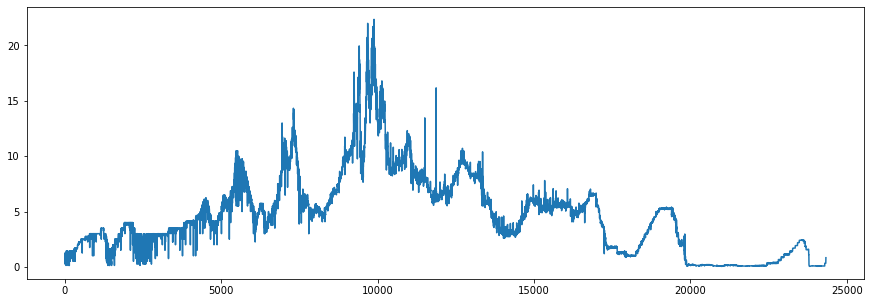

In [461]:
plt.figure(figsize=(15,5))
plt.plot(df_fed['value'])

In [462]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,last_gdp,last_unem,last_infl,CPI,달러인덱스,비율
0,2021-05-04,11.097391,48.192771,16.281368,-0.25,-3.4,6.7,1.4,2.029159,-0.287315,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
1,2021-05-03,12.571347,51.820728,17.105960,-0.25,-3.4,6.7,1.4,1.971019,0.324265,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2,2021-04-30,11.197450,55.988593,17.876970,-0.25,-3.4,6.7,1.4,1.990275,0.026499,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
3,2021-04-29,11.528566,59.032577,16.264624,-0.25,-3.4,6.7,1.4,1.980892,0.183573,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
4,2021-04-28,8.756708,57.308809,15.444055,-0.25,-3.4,6.7,1.4,1.971506,0.278023,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
...,...,...,...,...,...,...,...,...,...,...,...
5292,2000-04-10,5.189039,-10.256410,11.199047,0.25,4.8,4.0,2.7,0.859437,5.067064,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
5293,2000-04-07,6.968294,-9.434251,11.267855,0.25,4.8,4.0,2.7,0.893860,4.666667,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
5294,2000-04-06,6.083732,-11.047128,11.846718,0.25,4.8,4.0,2.7,0.901405,4.694040,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
5295,2000-04-05,6.810061,-9.416833,9.839233,0.25,4.8,4.0,2.7,0.908952,4.797601,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."


In [463]:
url = 'https://finance.yahoo.com/quote/%5EGSPC/history?period1=-1325635200&period2=1652400000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'

In [464]:
# driver = webdriver.Chrome('data_files/chromedriver.exe')

# driver.get('https://finance.yahoo.com/quote/%5EGSPC/history?period1=-1325635200&period2=1652400000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true')



# last_height = driver.execute_script("return document.documentElement.scrollHeight")
# last_height

# driver.execute_script(f"window.scrollTo(0, {last_height});")

# SCROLL_PAUSE_SEC = 1
# # 스크롤 높이 가져옴
# last_height = driver.execute_script("return document.documentElement.scrollHeight")
# time.sleep(SCROLL_PAUSE_SEC)
# while True:
#     # 끝까지 스크롤 다운
#     driver.execute_script(f"window.scrollTo(0, {last_height});")

#     # 1초 대기
#     time.sleep(SCROLL_PAUSE_SEC)

#     # 스크롤 다운 후 스크롤 높이 다시 가져옴
#     new_height = driver.execute_script("return document.documentElement.scrollHeight")
#     if new_height == last_height:
#         break
#     last_height = new_height

# html = driver.page_source

# soup = BeautifulSoup(html, 'html.parser')

# data = soup.select('table')

# table = parser_functions.make2d(data[0])

# df_sp = pd.DataFrame(data=table[1:], columns=table[0])

In [465]:
# df_sp[:-1].to_csv('data_files/S&P 500 1927이후 데이터.csv')

In [466]:
df_sp = pd.read_csv('data_files/S&P 500 1927이후 데이터.csv', index_col='Unnamed: 0')

In [467]:
df_doller = pd.read_csv('data_files/달러인덱스1970~.csv')

In [468]:
df_fed = pd.read_csv('data_files/fed-funds-rate-historical-chart.csv')

In [469]:
df_sp.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
23700,"Jan 06, 1928",17.66,17.66,17.66,17.66,17.66,-
23701,"Jan 05, 1928",17.55,17.55,17.55,17.55,17.55,-
23702,"Jan 04, 1928",17.72,17.72,17.72,17.72,17.72,-
23703,"Jan 03, 1928",17.76,17.76,17.76,17.76,17.76,-
23704,"Dec 30, 1927",17.66,17.66,17.66,17.66,17.66,-


In [470]:
df_doller.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-01-04,120.529999,120.529999,120.529999,120.529999,120.529999,0.0
1,1971-01-05,120.519997,120.519997,120.519997,120.519997,120.519997,0.0
2,1971-01-06,120.489998,120.489998,120.489998,120.489998,120.489998,0.0
3,1971-01-07,120.550003,120.550003,120.550003,120.550003,120.550003,0.0
4,1971-01-08,120.529999,120.529999,120.529999,120.529999,120.529999,0.0


In [471]:
df_fed.head()

,date,value
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88


In [472]:
df_sp['Date'] = pd.to_datetime(df_sp['Date']).apply(lambda x: str(x)[:10])

In [473]:
df_doller = df_doller[['Date', 'Close']]
df_sp = df_sp[['Date', 'Close*']]

In [474]:
df_sp.columns = ['date', 'sp']
df_doller.columns = ['date', 'doller']
df_fed.columns = ['date', 'fed']

In [475]:
df_sp.isna().sum()

date    0
sp      0
dtype: int64

In [476]:
df_doller.dropna(inplace=True)

In [477]:
df_fed.dropna(inplace=True)

In [478]:
df_merge = pd.merge(df_sp, df_doller, how='inner', on='date')

In [479]:
df_merge = pd.merge(df_merge, df_fed, how='inner', on='date')

In [480]:
df_merge.isna().sum()

date      0
sp        0
doller    0
fed       0
dtype: int64

In [481]:
# df_merge.to_csv('data_files/sp_dol_fed 1971~.csv')

In [482]:
df = pd.read_csv('data_files/sp_dol_fed 1971~.csv', index_col="Unnamed: 0")

In [483]:
df.head(3)

,date,sp,doller,fed
0,2022-05-10,"4,001.05",103.919998,0.83
1,2022-05-09,"3,991.24",103.650002,0.83
2,2022-05-06,"4,123.34",103.660004,0.83


In [484]:
df_gdp = pd.read_csv('data_files/GDP1950.csv')

In [485]:
df_cpi = pd.read_csv('data_files/CPI1950.csv')

In [486]:
Q_li = []
for date in df['date']:
    year = date.split('-')[0]
    month = int(date.split('-')[1])
    if 3 >= month >= 1:
        Q = 'Q1'
    elif 6 >= month:
        Q = 'Q2'
    elif 9 >= month:
        Q = 'Q3'
    else:
        Q = 'Q4'
        
    Q_li.append(year + '-' + Q)

In [487]:
df['Q'] = Q_li

In [488]:
df['year'] = df['date'].apply(lambda x: x[:4])

In [489]:
df

,date,sp,doller,fed,Q,year
0,2022-05-10,"4,001.05",103.919998,0.83,2022-Q2,2022
1,2022-05-09,"3,991.24",103.650002,0.83,2022-Q2,2022
2,2022-05-06,"4,123.34",103.660004,0.83,2022-Q2,2022
3,2022-05-05,"4,146.87",103.750000,0.83,2022-Q2,2022
4,2022-05-04,"4,300.17",102.589996,0.33,2022-Q2,2022
...,...,...,...,...,...,...
12877,1971-01-08,92.19,120.529999,4.50,1971-Q1,1971
12878,1971-01-07,92.38,120.550003,4.50,1971-Q1,1971
12879,1971-01-06,92.35,120.489998,3.75,1971-Q1,1971
12880,1971-01-05,91.80,120.519997,5.50,1971-Q1,1971


In [490]:
df_gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [491]:
Q_li = []
for date in df_gdp['DATE']:
    year = date.split('-')[0]
    month = int(date.split('-')[1])
    if 3 >= month >= 1:
        Q = 'Q1'
    elif 6 >= month:
        Q = 'Q2'
    elif 9 >= month:
        Q = 'Q3'
    else:
        Q = 'Q4'
        
    Q_li.append(year + '-' + Q)

In [492]:
df_gdp['Q'] = Q_li

In [493]:
df_gdp

,DATE,GDP,Q
0,1947-01-01,243.164,1947-Q1
1,1947-04-01,245.968,1947-Q2
2,1947-07-01,249.585,1947-Q3
3,1947-10-01,259.745,1947-Q4
4,1948-01-01,265.742,1948-Q1
...,...,...,...
296,2021-01-01,22038.226,2021-Q1
297,2021-04-01,22740.959,2021-Q2
298,2021-07-01,23202.344,2021-Q3
299,2021-10-01,24002.815,2021-Q4


In [494]:
df = df[df['Q'] != '2022-Q2']

In [495]:
gdp_li = []
for q in df['Q']:
    gdp_li.append(df_gdp[df_gdp['Q'] == q]['GDP'].values[0])
  

In [496]:
df['gdp'] = gdp_li

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_9444/3853124977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gdp'] = gdp_li


In [497]:
df_cpi.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [498]:
df_cpi['DATE'] = df_cpi['DATE'].apply(lambda x :x[:-3])

In [499]:
cpi_li = []
for date in df['date']:
    print(date[:-3])
    cpi_li.append(df_cpi[df_cpi['DATE'] == date[:-3]]['CPIAUCSL'].values[0])

2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-03
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-02
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2022-01
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-12
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-11
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-10
2021-09


2018-01
2018-01
2018-01
2018-01
2018-01
2018-01
2018-01
2018-01
2018-01
2018-01
2018-01
2018-01
2018-01
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-12
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-11
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-10
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-09
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-08
2017-07
2017-07
2017-07
2017-07
2017-07
2017-07


2013-12
2013-12
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-11
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-10
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-09
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-08
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-07
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06
2013-06


2009-10
2009-10
2009-10
2009-10
2009-10
2009-10
2009-10
2009-10
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-09
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-08
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-07
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-06
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-05
2009-04
2009-04
2009-04
2009-04
2009-04
2009-04
2009-04
2009-04
2009-04
2009-04
2009-04


2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-08
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-07
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-06
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-05
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-04
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03
2005-03


1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-06
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-05
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-04
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-03
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-02
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1999-01
1998-12
1998-12
1998-12
1998-12
1998-12
1998-12


1993-06
1993-06
1993-06
1993-06
1993-06
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-05
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-04
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-03
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-02
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1993-01
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12
1992-12


1989-04
1989-04
1989-04
1989-04
1989-04
1989-04
1989-04
1989-04
1989-04
1989-04
1989-04
1989-04
1989-04
1989-04
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-03
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-02
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1989-01
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-12
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-11
1988-10
1988-10
1988-10
1988-10
1988-10
1988-10
1988-10


1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-03
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-02
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1985-01
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-12
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-11
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-10
1984-09
1984-09
1984-09
1984-09
1984-09
1984-09
1984-09
1984-09
1984-09


1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-10
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-09
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-08
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-07
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-06
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05
1980-05


1976-07
1976-07
1976-07
1976-07
1976-07
1976-07
1976-07
1976-07
1976-07
1976-07
1976-07
1976-07
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-06
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-05
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-04
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-03
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-02
1976-01
1976-01
1976-01
1976-01
1976-01
1976-01
1976-01
1976-01
1976-01


1972-04
1972-04
1972-04
1972-04
1972-04
1972-04
1972-04
1972-04
1972-04
1972-04
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-03
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-02
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1972-01
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-12
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-11
1971-10
1971-10
1971-10
1971-10
1971-10
1971-10
1971-10
1971-10
1971-10
1971-10
1971-10
1971-10


In [500]:
df['cpi'] = cpi_li

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_9444/3169080683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cpi'] = cpi_li


In [501]:
df

,date,sp,doller,fed,Q,year,gdp,cpi
27,2022-03-31,"4,530.41",98.309998,0.33,2022-Q1,2022,24382.683,287.708
28,2022-03-30,"4,602.45",97.790001,0.33,2022-Q1,2022,24382.683,287.708
29,2022-03-29,"4,631.60",98.400002,0.33,2022-Q1,2022,24382.683,287.708
30,2022-03-28,"4,575.52",99.089996,0.33,2022-Q1,2022,24382.683,287.708
31,2022-03-25,"4,543.06",98.809998,0.33,2022-Q1,2022,24382.683,287.708
...,...,...,...,...,...,...,...,...
12877,1971-01-08,92.19,120.529999,4.50,1971-Q1,1971,1135.156,39.900
12878,1971-01-07,92.38,120.550003,4.50,1971-Q1,1971,1135.156,39.900
12879,1971-01-06,92.35,120.489998,3.75,1971-Q1,1971,1135.156,39.900
12880,1971-01-05,91.80,120.519997,5.50,1971-Q1,1971,1135.156,39.900


In [502]:
df = df[['date', 'sp', 'doller', 'fed', 'gdp', 'cpi']]

In [503]:
df.set_index('date', inplace=True)

In [504]:
# df.to_csv('data_files/1970이후 지표.csv')

In [505]:
df_rate = pd.read_csv('data_files/딥러닝 데이터_비율.csv', index_col='Unnamed: 0')

In [506]:
df = pd.read_csv('data_files/2000이후 데이터.csv')

In [507]:
df.head()

,날짜,S&P500,미국채10년,GSCI,기준금리,연도
0,2022-05-04,4300.17,2.946,3958.5029,1.5,2022
1,2022-05-03,4175.48,2.975,3837.0591,1.5,2022
2,2022-05-02,4155.38,2.977,3903.0850,1.5,2022
3,2022-04-29,4131.93,2.938,3882.9910,1.5,2022
4,2022-04-28,4287.50,2.832,3884.4270,1.5,2022


In [508]:
df_rate.head()

,날짜,S&P500,미국채10년,GSCI,기준금리,last_gdp,last_unem,last_infl,CPI,달러인덱스,비율
0,2021-05-04,11.097391,48.192771,16.281368,-0.25,-3.4,6.7,1.4,2.029159,-0.287315,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
1,2021-05-03,12.571347,51.820728,17.105960,-0.25,-3.4,6.7,1.4,1.971019,0.324265,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2,2021-04-30,11.197450,55.988593,17.876970,-0.25,-3.4,6.7,1.4,1.990275,0.026499,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
3,2021-04-29,11.528566,59.032577,16.264624,-0.25,-3.4,6.7,1.4,1.980892,0.183573,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
4,2021-04-28,8.756708,57.308809,15.444055,-0.25,-3.4,6.7,1.4,1.971506,0.278023,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."


In [509]:
df[['S&P500','미국채10년', 'GSCI']] = ((df[['S&P500','미국채10년', 'GSCI']].shift(-1) - df[['S&P500','미국채10년', 'GSCI']].shift(-2)) / df[['S&P500','미국채10년', 'GSCI']].shift(-2)) * 100

In [510]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,연도
0,2022-05-04,0.483710,-0.067182,-1.691634,1.5,2022
1,2022-05-03,0.567531,1.327434,0.517488,1.5,2022
2,2022-05-02,-3.628455,3.742938,-0.036968,1.5,2022
3,2022-04-29,2.474689,0.212314,1.030137,1.5,2022
4,2022-04-28,0.209810,3.592375,0.988552,1.5,2022
...,...,...,...,...,...,...
5611,2000-01-07,0.099850,-0.894075,-0.035951,5.0,2000
5612,2000-01-06,0.192940,1.538698,-0.946095,5.0,2000
5613,2000-01-05,-3.834524,-1.440704,-0.940808,5.0,2000
5614,2000-01-04,NaN,NaN,NaN,5.0,2000


In [989]:
df_sp = pd.read_csv('data_files/S&P 500 1927이후 데이터.csv', index_col='Unnamed: 0')
df_sp.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 12, 2022","3,903.95","3,964.80","3,858.87","3,930.08","3,930.08","4,964,130,000"
1,"May 11, 2022","3,990.08","4,049.09","3,928.82","3,935.18","3,935.18","4,683,220,000"
2,"May 10, 2022","4,035.18","4,068.82","3,958.17","4,001.05","4,001.05","4,630,150,000"
3,"May 09, 2022","4,081.27","4,081.27","3,975.48","3,991.24","3,991.24","4,746,120,000"
4,"May 06, 2022","4,128.17","4,157.69","4,067.91","4,123.34","4,123.34","4,254,300,000"


In [990]:
df_mi1 = pd.read_csv('data_files/10년만기 미국채 선물 역사적 데이터 1980.csv')
df_mi2 = pd.read_csv('data_files/10년만기 미국채 선물 역사적 데이터 1980 2.csv')

In [991]:
df_mi = pd.concat([df_mi1, df_mi2])
df_mi

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 08월 30일,134.13,133.91,134.19,133.86,672.06K,0.17%
1,2021년 08월 28일,133.89,133.89,133.89,133.89,-,0.00%
2,2021년 08월 27일,133.89,133.52,133.97,133.42,2.46M,0.22%
3,2021년 08월 26일,133.59,133.61,133.69,133.38,3.10M,-0.02%
4,2021년 08월 25일,133.63,133.94,134.05,133.55,3.16M,-0.27%
...,...,...,...,...,...,...,...
4994,1982년 05월 10일,73.12,73.06,73.34,72.97,4.23K,-0.18%
4995,1982년 05월 07일,73.25,73.25,73.31,72.84,6.53K,0.38%
4996,1982년 05월 06일,72.97,72.53,73.00,72.44,9.40K,1.43%
4997,1982년 05월 05일,71.94,72.03,72.25,71.78,14.08K,0.18%


In [992]:
df_gsci1 = pd.read_csv('data_files/S&P GSCI Commodity Total Return 내역 1980 1.csv')
df_gsci2 = pd.read_csv('data_files/S&P GSCI Commodity Total Return 내역 1980 2.csv')
df_gsci3 = pd.read_csv('data_files/S&P GSCI Commodity Total Return 내역 1980 3.csv')

In [993]:
df_gsci = pd.concat([df_gsci1, df_gsci2, df_gsci3])
df_gsci

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 05월 13일,"3,938.9419","3,860.3716","3,944.7239","3,860.3154",-,2.04%
1,2022년 05월 12일,"3,860.2749","3,857.7122","3,874.6638","3,773.2437",-,0.07%
2,2022년 05월 11일,"3,857.5439","3,731.3772","3,870.5911","3,713.4624",-,3.33%
3,2022년 05월 10일,"3,733.1130","3,778.9155","3,805.8521","3,715.7375",-,-1.22%
4,2022년 05월 09일,"3,779.1580","3,955.5261","3,973.7759","3,768.0078",-,-4.45%
...,...,...,...,...,...,...,...
4994,1980년 01월 03일,695.1000,695.1000,695.1000,695.1000,-,0.39%
4995,1980년 01월 02일,692.4000,692.4000,692.4000,692.4000,-,0.85%
4996,1979년 12월 31일,686.5600,686.5600,686.5600,686.5600,-,-0.48%
4997,1979년 12월 28일,689.8400,689.8400,689.8400,689.8400,-,0.59%


In [994]:
df_sp['Date'] = pd.to_datetime(df_sp['Date'])

In [995]:
df_sp['Date'] = df_sp['Date'].apply(lambda x: str(x)[:10])

In [996]:
df_sp['Close*'] = df_sp['Close*'].apply(lambda x: float(x.replace(',', '')))

In [997]:
df_sp['Open'] = df_sp['Open'].apply(lambda x: float(x.replace(',', '')))

In [998]:
df_sp['Volume'] = df_sp['Volume'].apply(lambda x: int(x.replace(',', '')) if x.replace(',', '').isdigit() else np.nan)

In [999]:
df_sp.dropna(inplace=True)

<AxesSubplot:>

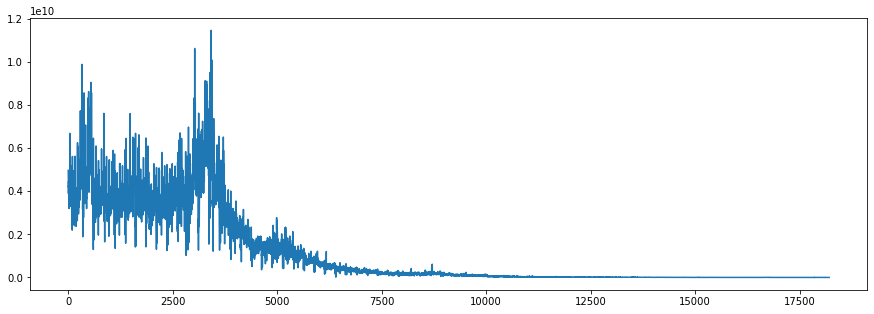

In [1000]:
df_sp['Volume'].plot(figsize=(15, 5))

In [1001]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18209 entries, 0 to 18208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         18209 non-null  object 
 1   Open         18209 non-null  float64
 2   High         18209 non-null  object 
 3   Low          18209 non-null  object 
 4   Close*       18209 non-null  float64
 5   Adj Close**  18209 non-null  object 
 6   Volume       18209 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.1+ MB


In [1002]:
df_sp = df_sp[['Date', 'Open', 'Close*', 'Volume']]

In [1003]:
df_sp.columns = ['date', 'sp_open', 'sp_close', 'sp_volume']

In [1004]:
df_sp

,date,sp_open,sp_close,sp_volume
0,2022-05-12,3903.95,3930.08,4.964130e+09
1,2022-05-11,3990.08,3935.18,4.683220e+09
2,2022-05-10,4035.18,4001.05,4.630150e+09
3,2022-05-09,4081.27,3991.24,4.746120e+09
4,2022-05-06,4128.17,4123.34,4.254300e+09
...,...,...,...,...
18204,1950-01-09,17.08,17.08,2.520000e+06
18205,1950-01-06,16.98,16.98,2.010000e+06
18206,1950-01-05,16.93,16.93,2.550000e+06
18207,1950-01-04,16.85,16.85,1.890000e+06


In [1005]:
df_mi

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 08월 30일,134.13,133.91,134.19,133.86,672.06K,0.17%
1,2021년 08월 28일,133.89,133.89,133.89,133.89,-,0.00%
2,2021년 08월 27일,133.89,133.52,133.97,133.42,2.46M,0.22%
3,2021년 08월 26일,133.59,133.61,133.69,133.38,3.10M,-0.02%
4,2021년 08월 25일,133.63,133.94,134.05,133.55,3.16M,-0.27%
...,...,...,...,...,...,...,...
4994,1982년 05월 10일,73.12,73.06,73.34,72.97,4.23K,-0.18%
4995,1982년 05월 07일,73.25,73.25,73.31,72.84,6.53K,0.38%
4996,1982년 05월 06일,72.97,72.53,73.00,72.44,9.40K,1.43%
4997,1982년 05월 05일,71.94,72.03,72.25,71.78,14.08K,0.18%


In [1006]:
df_mi['날짜'] = df_mi['날짜'].apply(lambda x: str(pd.to_datetime(re.sub(r'[^0-9]', '', x)))[:10])

In [1007]:
df_mi['거래량'] = df_mi['거래량'].apply(lambda x: float(x[:-1]) * 1000 if x[-1] == 'K' else float(x[:-1]) * 1000000 if x[-1] == 'M' else np.nan)

In [1008]:
df_mi.dropna(inplace=True)

In [1009]:
df_mi = df_mi[['날짜', '종가', '거래량']]

In [1010]:
df_mi.columns = ['date', 'mi_close', 'mi_volume']

In [1011]:
df_mi

,date,mi_close,mi_volume
0,2021-08-30,134.13,672060.0
2,2021-08-27,133.89,2460000.0
3,2021-08-26,133.59,3100000.0
4,2021-08-25,133.63,3160000.0
5,2021-08-24,133.98,1880000.0
...,...,...,...
4994,1982-05-10,73.12,4230.0
4995,1982-05-07,73.25,6530.0
4996,1982-05-06,72.97,9400.0
4997,1982-05-05,71.94,14080.0


In [1012]:
df_gsci['날짜'] = df_gsci['날짜'].apply(lambda x: str(pd.to_datetime(re.sub(r'[^0-9]', '', x)))[:10])

In [1013]:
df_gsci['종가'] = df_gsci['종가'].apply(lambda x: float(x.replace(',', '')))

In [1014]:
df_gsci = df_gsci[['날짜', '종가']]

In [1015]:
df_gsci.columns = ['date', 'gsci_close']

In [1016]:
df_mg = pd.merge(df_sp, df_mi, on='date', how='inner')

In [1017]:
df_mg = pd.merge(df_mg, df_gsci, on='date', how='inner')

In [1018]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9765 entries, 0 to 9764
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        9765 non-null   object 
 1   sp_open     9765 non-null   float64
 2   sp_close    9765 non-null   float64
 3   sp_volume   9765 non-null   float64
 4   mi_close    9765 non-null   float64
 5   mi_volume   9765 non-null   float64
 6   gsci_close  9765 non-null   float64
dtypes: float64(6), object(1)
memory usage: 610.3+ KB


In [1019]:
df_mg

,date,sp_open,sp_close,sp_volume,mi_close,mi_volume,gsci_close
0,2021-08-30,4513.76,4528.79,2.557300e+09,134.13,672060.0,2589.3459
1,2021-08-27,4474.10,4509.37,2.862360e+09,133.89,2460000.0,2586.4009
2,2021-08-26,4493.75,4470.00,2.704600e+09,133.59,3100000.0,2549.6780
3,2021-08-25,4490.45,4496.19,2.554680e+09,133.63,3160000.0,2563.0581
4,2021-08-24,4484.40,4486.23,3.037770e+09,133.98,1880000.0,2542.4231
...,...,...,...,...,...,...,...
9760,1982-05-10,119.08,118.38,4.630000e+07,73.12,4230.0,668.6200
9761,1982-05-07,119.08,119.47,6.713000e+07,73.25,6530.0,668.2800
9762,1982-05-06,118.82,118.68,6.754000e+07,72.97,9400.0,666.9500
9763,1982-05-05,117.85,117.67,5.886000e+07,71.94,14080.0,663.9200


In [1020]:
df = pd.read_csv('data_files/1970이후 지표.csv')

In [1021]:
df = df[['date', 'doller', 'fed', 'gdp', 'cpi']]

In [1022]:
df_mg = pd.merge(df, df_mg, on='date', how='inner')

In [1023]:
df_mg

,date,doller,fed,gdp,cpi,sp_open,sp_close,sp_volume,mi_close,mi_volume,gsci_close
0,2021-08-30,92.650002,0.08,23202.344,273.092,4513.76,4528.79,2.557300e+09,134.13,672060.0,2589.3459
1,2021-08-27,92.690002,0.08,23202.344,273.092,4474.10,4509.37,2.862360e+09,133.89,2460000.0,2586.4009
2,2021-08-26,93.059998,0.09,23202.344,273.092,4493.75,4470.00,2.704600e+09,133.59,3100000.0,2549.6780
3,2021-08-25,92.830002,0.09,23202.344,273.092,4490.45,4496.19,2.554680e+09,133.63,3160000.0,2563.0581
4,2021-08-24,92.889999,0.09,23202.344,273.092,4484.40,4486.23,3.037770e+09,133.98,1880000.0,2542.4231
...,...,...,...,...,...,...,...,...,...,...,...
9740,1982-05-10,109.730003,14.59,3331.972,95.900,119.08,118.38,4.630000e+07,73.12,4230.0,668.6200
9741,1982-05-07,109.860001,14.90,3331.972,95.900,119.08,119.47,6.713000e+07,73.25,6530.0,668.2800
9742,1982-05-06,110.500000,15.25,3331.972,95.900,118.82,118.68,6.754000e+07,72.97,9400.0,666.9500
9743,1982-05-05,111.029999,15.74,3331.972,95.900,117.85,117.67,5.886000e+07,71.94,14080.0,663.9200


In [1024]:
df_unem = pd.read_csv('data_files/세계 실업률 55~.csv')

In [1025]:
df_unem = df_unem[df_unem['LOCATION'] == "USA"]

In [1026]:
df_unem

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
11616,USA,HUR,TOT,PC_LF,M,1955-01,4.9,NaN
11617,USA,HUR,TOT,PC_LF,M,1955-02,4.7,NaN
11618,USA,HUR,TOT,PC_LF,M,1955-03,4.6,NaN
11619,USA,HUR,TOT,PC_LF,M,1955-04,4.7,NaN
11620,USA,HUR,TOT,PC_LF,M,1955-05,4.3,NaN
...,...,...,...,...,...,...,...,...
12419,USA,HUR,TOT,PC_LF,M,2021-12,3.9,NaN
12420,USA,HUR,TOT,PC_LF,M,2022-01,4.0,NaN
12421,USA,HUR,TOT,PC_LF,M,2022-02,3.8,NaN
12422,USA,HUR,TOT,PC_LF,M,2022-03,3.6,NaN


In [1027]:
df_unem = df_unem[['TIME', 'Value']].reset_index(drop=True)

In [1028]:
unem_li = []
for date in df_mg['date']:
    print(date, df_unem[df_unem['TIME'] == date[:-3]]['Value'].values[0])
    unem_li.append(df_unem[df_unem['TIME'] == date[:-3]]['Value'].values[0])

2021-08-30 5.2
2021-08-27 5.2
2021-08-26 5.2
2021-08-25 5.2
2021-08-24 5.2
2021-08-23 5.2
2021-08-20 5.2
2021-08-19 5.2
2021-08-18 5.2
2021-08-17 5.2
2021-08-16 5.2
2021-08-13 5.2
2021-08-12 5.2
2021-08-11 5.2
2021-08-10 5.2
2021-08-09 5.2
2021-08-06 5.2
2021-08-05 5.2
2021-08-04 5.2
2021-08-03 5.2
2021-08-02 5.2
2021-07-30 5.4
2021-07-29 5.4
2021-07-28 5.4
2021-07-27 5.4
2021-07-26 5.4
2021-07-23 5.4
2021-07-22 5.4
2021-07-21 5.4
2021-07-20 5.4
2021-07-19 5.4
2021-07-16 5.4
2021-07-15 5.4
2021-07-14 5.4
2021-07-13 5.4
2021-07-12 5.4
2021-07-09 5.4
2021-07-08 5.4
2021-07-07 5.4
2021-07-06 5.4
2021-07-02 5.4
2021-07-01 5.4
2021-06-30 5.9
2021-06-29 5.9
2021-06-28 5.9
2021-06-25 5.9
2021-06-24 5.9
2021-06-23 5.9
2021-06-22 5.9
2021-06-21 5.9
2021-06-18 5.9
2021-06-17 5.9
2021-06-16 5.9
2021-06-15 5.9
2021-06-14 5.9
2021-06-11 5.9
2021-06-10 5.9
2021-06-09 5.9
2021-06-08 5.9
2021-06-07 5.9
2021-06-04 5.9
2021-06-03 5.9
2021-06-02 5.9
2021-06-01 5.9
2021-05-28 5.8
2021-05-27 5.8
2021-05-26

2019-06-26 3.6
2019-06-25 3.6
2019-06-24 3.6
2019-06-21 3.6
2019-06-20 3.6
2019-06-19 3.6
2019-06-18 3.6
2019-06-17 3.6
2019-06-14 3.6
2019-06-13 3.6
2019-06-12 3.6
2019-06-11 3.6
2019-06-10 3.6
2019-06-07 3.6
2019-06-06 3.6
2019-06-05 3.6
2019-06-04 3.6
2019-06-03 3.6
2019-05-31 3.6
2019-05-30 3.6
2019-05-29 3.6
2019-05-28 3.6
2019-05-24 3.6
2019-05-23 3.6
2019-05-22 3.6
2019-05-21 3.6
2019-05-20 3.6
2019-05-17 3.6
2019-05-16 3.6
2019-05-15 3.6
2019-05-14 3.6
2019-05-13 3.6
2019-05-10 3.6
2019-05-09 3.6
2019-05-08 3.6
2019-05-07 3.6
2019-05-06 3.6
2019-05-03 3.6
2019-05-02 3.6
2019-05-01 3.6
2019-04-30 3.6
2019-04-29 3.6
2019-04-26 3.6
2019-04-25 3.6
2019-04-24 3.6
2019-04-23 3.6
2019-04-22 3.6
2019-04-18 3.6
2019-04-17 3.6
2019-04-16 3.6
2019-04-15 3.6
2019-04-12 3.6
2019-04-11 3.6
2019-04-10 3.6
2019-04-09 3.6
2019-04-08 3.6
2019-04-05 3.6
2019-04-04 3.6
2019-04-03 3.6
2019-04-02 3.6
2019-04-01 3.6
2019-03-29 3.8
2019-03-28 3.8
2019-03-27 3.8
2019-03-26 3.8
2019-03-25 3.8
2019-03-22

2016-05-23 4.8
2016-05-20 4.8
2016-05-19 4.8
2016-05-18 4.8
2016-05-17 4.8
2016-05-16 4.8
2016-05-13 4.8
2016-05-12 4.8
2016-05-11 4.8
2016-05-10 4.8
2016-05-09 4.8
2016-05-06 4.8
2016-05-05 4.8
2016-05-04 4.8
2016-05-03 4.8
2016-05-02 4.8
2016-04-29 5.1
2016-04-28 5.1
2016-04-27 5.1
2016-04-26 5.1
2016-04-25 5.1
2016-04-22 5.1
2016-04-21 5.1
2016-04-20 5.1
2016-04-19 5.1
2016-04-18 5.1
2016-04-15 5.1
2016-04-14 5.1
2016-04-13 5.1
2016-04-12 5.1
2016-04-11 5.1
2016-04-08 5.1
2016-04-07 5.1
2016-04-06 5.1
2016-04-05 5.1
2016-04-04 5.1
2016-04-01 5.1
2016-03-31 5.0
2016-03-30 5.0
2016-03-29 5.0
2016-03-28 5.0
2016-03-24 5.0
2016-03-23 5.0
2016-03-22 5.0
2016-03-21 5.0
2016-03-18 5.0
2016-03-17 5.0
2016-03-16 5.0
2016-03-15 5.0
2016-03-14 5.0
2016-03-11 5.0
2016-03-10 5.0
2016-03-09 5.0
2016-03-08 5.0
2016-03-07 5.0
2016-03-04 5.0
2016-03-03 5.0
2016-03-02 5.0
2016-03-01 5.0
2016-02-29 4.9
2016-02-26 4.9
2016-02-25 4.9
2016-02-24 4.9
2016-02-23 4.9
2016-02-22 4.9
2016-02-19 4.9
2016-02-18

2013-04-29 7.6
2013-04-26 7.6
2013-04-25 7.6
2013-04-24 7.6
2013-04-23 7.6
2013-04-22 7.6
2013-04-19 7.6
2013-04-18 7.6
2013-04-17 7.6
2013-04-16 7.6
2013-04-15 7.6
2013-04-12 7.6
2013-04-11 7.6
2013-04-10 7.6
2013-04-09 7.6
2013-04-08 7.6
2013-04-05 7.6
2013-04-04 7.6
2013-04-03 7.6
2013-04-02 7.6
2013-04-01 7.6
2013-03-28 7.5
2013-03-27 7.5
2013-03-26 7.5
2013-03-25 7.5
2013-03-22 7.5
2013-03-21 7.5
2013-03-20 7.5
2013-03-19 7.5
2013-03-18 7.5
2013-03-15 7.5
2013-03-14 7.5
2013-03-13 7.5
2013-03-12 7.5
2013-03-11 7.5
2013-03-08 7.5
2013-03-07 7.5
2013-03-06 7.5
2013-03-05 7.5
2013-03-04 7.5
2013-03-01 7.5
2013-02-28 7.7
2013-02-27 7.7
2013-02-26 7.7
2013-02-25 7.7
2013-02-22 7.7
2013-02-21 7.7
2013-02-20 7.7
2013-02-19 7.7
2013-02-15 7.7
2013-02-14 7.7
2013-02-13 7.7
2013-02-12 7.7
2013-02-11 7.7
2013-02-08 7.7
2013-02-07 7.7
2013-02-06 7.7
2013-02-05 7.7
2013-02-04 7.7
2013-02-01 7.7
2013-01-31 8.0
2013-01-30 8.0
2013-01-29 8.0
2013-01-28 8.0
2013-01-25 8.0
2013-01-24 8.0
2013-01-23

2010-02-22 9.8
2010-02-19 9.8
2010-02-18 9.8
2010-02-17 9.8
2010-02-16 9.8
2010-02-12 9.8
2010-02-11 9.8
2010-02-10 9.8
2010-02-09 9.8
2010-02-08 9.8
2010-02-05 9.8
2010-02-04 9.8
2010-02-03 9.8
2010-02-02 9.8
2010-02-01 9.8
2010-01-29 9.8
2010-01-28 9.8
2010-01-27 9.8
2010-01-26 9.8
2010-01-25 9.8
2010-01-22 9.8
2010-01-21 9.8
2010-01-20 9.8
2010-01-19 9.8
2010-01-15 9.8
2010-01-14 9.8
2010-01-13 9.8
2010-01-12 9.8
2010-01-11 9.8
2010-01-08 9.8
2010-01-07 9.8
2010-01-06 9.8
2010-01-05 9.8
2010-01-04 9.8
2009-12-31 9.9
2009-12-30 9.9
2009-12-29 9.9
2009-12-28 9.9
2009-12-24 9.9
2009-12-23 9.9
2009-12-22 9.9
2009-12-21 9.9
2009-12-18 9.9
2009-12-17 9.9
2009-12-16 9.9
2009-12-15 9.9
2009-12-14 9.9
2009-12-11 9.9
2009-12-10 9.9
2009-12-09 9.9
2009-12-08 9.9
2009-12-07 9.9
2009-12-04 9.9
2009-12-03 9.9
2009-12-02 9.9
2009-12-01 9.9
2009-11-30 9.9
2009-11-27 9.9
2009-11-25 9.9
2009-11-24 9.9
2009-11-23 9.9
2009-11-20 9.9
2009-11-19 9.9
2009-11-18 9.9
2009-11-17 9.9
2009-11-16 9.9
2009-11-13

2007-01-16 4.6
2007-01-12 4.6
2007-01-11 4.6
2007-01-10 4.6
2007-01-09 4.6
2007-01-08 4.6
2007-01-05 4.6
2007-01-04 4.6
2007-01-03 4.6
2006-12-29 4.4
2006-12-28 4.4
2006-12-27 4.4
2006-12-26 4.4
2006-12-22 4.4
2006-12-21 4.4
2006-12-20 4.4
2006-12-19 4.4
2006-12-18 4.4
2006-12-15 4.4
2006-12-14 4.4
2006-12-13 4.4
2006-12-12 4.4
2006-12-11 4.4
2006-12-08 4.4
2006-12-07 4.4
2006-12-06 4.4
2006-12-05 4.4
2006-12-04 4.4
2006-12-01 4.4
2006-11-30 4.5
2006-11-29 4.5
2006-11-28 4.5
2006-11-27 4.5
2006-11-24 4.5
2006-11-22 4.5
2006-11-21 4.5
2006-11-20 4.5
2006-11-17 4.5
2006-11-16 4.5
2006-11-15 4.5
2006-11-14 4.5
2006-11-13 4.5
2006-11-10 4.5
2006-11-09 4.5
2006-11-08 4.5
2006-11-07 4.5
2006-11-06 4.5
2006-11-03 4.5
2006-11-02 4.5
2006-11-01 4.5
2006-10-31 4.4
2006-10-30 4.4
2006-10-27 4.4
2006-10-26 4.4
2006-10-25 4.4
2006-10-24 4.4
2006-10-23 4.4
2006-10-20 4.4
2006-10-19 4.4
2006-10-18 4.4
2006-10-17 4.4
2006-10-16 4.4
2006-10-13 4.4
2006-10-12 4.4
2006-10-11 4.4
2006-10-10 4.4
2006-10-06

2003-10-29 6.0
2003-10-28 6.0
2003-10-27 6.0
2003-10-24 6.0
2003-10-23 6.0
2003-10-22 6.0
2003-10-21 6.0
2003-10-20 6.0
2003-10-17 6.0
2003-10-16 6.0
2003-10-15 6.0
2003-10-14 6.0
2003-10-10 6.0
2003-10-09 6.0
2003-10-08 6.0
2003-10-07 6.0
2003-10-06 6.0
2003-10-03 6.0
2003-10-02 6.0
2003-10-01 6.0
2003-09-30 6.1
2003-09-29 6.1
2003-09-26 6.1
2003-09-25 6.1
2003-09-24 6.1
2003-09-23 6.1
2003-09-22 6.1
2003-09-19 6.1
2003-09-18 6.1
2003-09-17 6.1
2003-09-16 6.1
2003-09-15 6.1
2003-09-12 6.1
2003-09-11 6.1
2003-09-10 6.1
2003-09-09 6.1
2003-09-08 6.1
2003-09-05 6.1
2003-09-04 6.1
2003-09-03 6.1
2003-09-02 6.1
2003-08-29 6.1
2003-08-28 6.1
2003-08-27 6.1
2003-08-26 6.1
2003-08-25 6.1
2003-08-22 6.1
2003-08-21 6.1
2003-08-20 6.1
2003-08-19 6.1
2003-08-18 6.1
2003-08-15 6.1
2003-08-14 6.1
2003-08-13 6.1
2003-08-12 6.1
2003-08-11 6.1
2003-08-08 6.1
2003-08-07 6.1
2003-08-06 6.1
2003-08-05 6.1
2003-08-04 6.1
2003-08-01 6.1
2003-07-31 6.2
2003-07-30 6.2
2003-07-29 6.2
2003-07-28 6.2
2003-07-25

2000-08-04 4.1
2000-08-03 4.1
2000-08-02 4.1
2000-08-01 4.1
2000-07-31 4.0
2000-07-28 4.0
2000-07-27 4.0
2000-07-26 4.0
2000-07-25 4.0
2000-07-24 4.0
2000-07-21 4.0
2000-07-20 4.0
2000-07-19 4.0
2000-07-18 4.0
2000-07-17 4.0
2000-07-14 4.0
2000-07-13 4.0
2000-07-12 4.0
2000-07-11 4.0
2000-07-10 4.0
2000-07-07 4.0
2000-07-06 4.0
2000-07-05 4.0
2000-07-03 4.0
2000-06-30 4.0
2000-06-29 4.0
2000-06-28 4.0
2000-06-27 4.0
2000-06-26 4.0
2000-06-23 4.0
2000-06-22 4.0
2000-06-21 4.0
2000-06-20 4.0
2000-06-19 4.0
2000-06-16 4.0
2000-06-15 4.0
2000-06-14 4.0
2000-06-13 4.0
2000-06-12 4.0
2000-06-09 4.0
2000-06-08 4.0
2000-06-07 4.0
2000-06-06 4.0
2000-06-05 4.0
2000-06-02 4.0
2000-06-01 4.0
2000-05-31 4.0
2000-05-30 4.0
2000-05-26 4.0
2000-05-25 4.0
2000-05-24 4.0
2000-05-23 4.0
2000-05-22 4.0
2000-05-19 4.0
2000-05-18 4.0
2000-05-17 4.0
2000-05-16 4.0
2000-05-15 4.0
2000-05-12 4.0
2000-05-11 4.0
2000-05-10 4.0
2000-05-09 4.0
2000-05-08 4.0
2000-05-05 4.0
2000-05-04 4.0
2000-05-03 4.0
2000-05-02

1997-06-23 5.0
1997-06-20 5.0
1997-06-19 5.0
1997-06-18 5.0
1997-06-17 5.0
1997-06-16 5.0
1997-06-13 5.0
1997-06-12 5.0
1997-06-11 5.0
1997-06-10 5.0
1997-06-09 5.0
1997-06-06 5.0
1997-06-05 5.0
1997-06-04 5.0
1997-06-03 5.0
1997-06-02 5.0
1997-05-30 4.9
1997-05-29 4.9
1997-05-28 4.9
1997-05-27 4.9
1997-05-23 4.9
1997-05-22 4.9
1997-05-21 4.9
1997-05-20 4.9
1997-05-19 4.9
1997-05-16 4.9
1997-05-15 4.9
1997-05-14 4.9
1997-05-13 4.9
1997-05-12 4.9
1997-05-09 4.9
1997-05-08 4.9
1997-05-07 4.9
1997-05-06 4.9
1997-05-05 4.9
1997-05-02 4.9
1997-05-01 4.9
1997-04-30 5.1
1997-04-29 5.1
1997-04-28 5.1
1997-04-25 5.1
1997-04-24 5.1
1997-04-23 5.1
1997-04-22 5.1
1997-04-21 5.1
1997-04-18 5.1
1997-04-17 5.1
1997-04-16 5.1
1997-04-15 5.1
1997-04-14 5.1
1997-04-11 5.1
1997-04-10 5.1
1997-04-09 5.1
1997-04-08 5.1
1997-04-07 5.1
1997-04-04 5.1
1997-04-03 5.1
1997-04-02 5.1
1997-04-01 5.1
1997-03-31 5.2
1997-03-27 5.2
1997-03-26 5.2
1997-03-25 5.2
1997-03-24 5.2
1997-03-21 5.2
1997-03-20 5.2
1997-03-19

1994-04-18 6.4
1994-04-15 6.4
1994-04-14 6.4
1994-04-13 6.4
1994-04-12 6.4
1994-04-11 6.4
1994-04-08 6.4
1994-04-07 6.4
1994-04-06 6.4
1994-04-05 6.4
1994-04-04 6.4
1994-03-31 6.5
1994-03-30 6.5
1994-03-29 6.5
1994-03-28 6.5
1994-03-25 6.5
1994-03-24 6.5
1994-03-23 6.5
1994-03-22 6.5
1994-03-21 6.5
1994-03-18 6.5
1994-03-17 6.5
1994-03-16 6.5
1994-03-15 6.5
1994-03-14 6.5
1994-03-11 6.5
1994-03-10 6.5
1994-03-09 6.5
1994-03-08 6.5
1994-03-07 6.5
1994-03-04 6.5
1994-03-03 6.5
1994-03-02 6.5
1994-03-01 6.5
1994-02-28 6.6
1994-02-25 6.6
1994-02-24 6.6
1994-02-23 6.6
1994-02-22 6.6
1994-02-18 6.6
1994-02-17 6.6
1994-02-16 6.6
1994-02-15 6.6
1994-02-14 6.6
1994-02-11 6.6
1994-02-10 6.6
1994-02-09 6.6
1994-02-08 6.6
1994-02-07 6.6
1994-02-04 6.6
1994-02-03 6.6
1994-02-02 6.6
1994-02-01 6.6
1994-01-31 6.6
1994-01-28 6.6
1994-01-27 6.6
1994-01-26 6.6
1994-01-25 6.6
1994-01-24 6.6
1994-01-21 6.6
1994-01-20 6.6
1994-01-19 6.6
1994-01-18 6.6
1994-01-17 6.6
1994-01-14 6.6
1994-01-13 6.6
1994-01-12

1991-02-11 6.6
1991-02-08 6.6
1991-02-07 6.6
1991-02-06 6.6
1991-02-05 6.6
1991-02-04 6.6
1991-02-01 6.6
1991-01-31 6.4
1991-01-30 6.4
1991-01-29 6.4
1991-01-28 6.4
1991-01-25 6.4
1991-01-24 6.4
1991-01-23 6.4
1991-01-22 6.4
1991-01-21 6.4
1991-01-18 6.4
1991-01-17 6.4
1991-01-16 6.4
1991-01-15 6.4
1991-01-14 6.4
1991-01-11 6.4
1991-01-10 6.4
1991-01-09 6.4
1991-01-08 6.4
1991-01-07 6.4
1991-01-04 6.4
1991-01-03 6.4
1991-01-02 6.4
1990-12-31 6.3
1990-12-28 6.3
1990-12-27 6.3
1990-12-26 6.3
1990-12-24 6.3
1990-12-21 6.3
1990-12-20 6.3
1990-12-18 6.3
1990-12-17 6.3
1990-12-14 6.3
1990-12-13 6.3
1990-12-12 6.3
1990-12-11 6.3
1990-12-10 6.3
1990-12-07 6.3
1990-12-06 6.3
1990-12-05 6.3
1990-12-04 6.3
1990-12-03 6.3
1990-11-30 6.2
1990-11-29 6.2
1990-11-28 6.2
1990-11-27 6.2
1990-11-26 6.2
1990-11-23 6.2
1990-11-21 6.2
1990-11-20 6.2
1990-11-19 6.2
1990-11-16 6.2
1990-11-15 6.2
1990-11-14 6.2
1990-11-13 6.2
1990-11-12 6.2
1990-11-09 6.2
1990-11-08 6.2
1990-11-07 6.2
1990-11-06 6.2
1990-11-05

1987-11-18 5.8
1987-11-17 5.8
1987-11-16 5.8
1987-11-13 5.8
1987-11-12 5.8
1987-11-11 5.8
1987-11-10 5.8
1987-11-09 5.8
1987-11-06 5.8
1987-11-05 5.8
1987-11-04 5.8
1987-11-03 5.8
1987-11-02 5.8
1987-10-30 6.0
1987-10-29 6.0
1987-10-28 6.0
1987-10-27 6.0
1987-10-26 6.0
1987-10-23 6.0
1987-10-22 6.0
1987-10-21 6.0
1987-10-20 6.0
1987-10-19 6.0
1987-10-16 6.0
1987-10-15 6.0
1987-10-14 6.0
1987-10-13 6.0
1987-10-12 6.0
1987-10-09 6.0
1987-10-08 6.0
1987-10-07 6.0
1987-10-06 6.0
1987-10-05 6.0
1987-10-02 6.0
1987-10-01 6.0
1987-09-30 5.9
1987-09-29 5.9
1987-09-28 5.9
1987-09-25 5.9
1987-09-24 5.9
1987-09-23 5.9
1987-09-22 5.9
1987-09-18 5.9
1987-09-17 5.9
1987-09-16 5.9
1987-09-15 5.9
1987-09-14 5.9
1987-09-11 5.9
1987-09-10 5.9
1987-09-09 5.9
1987-09-08 5.9
1987-09-04 5.9
1987-09-03 5.9
1987-09-02 5.9
1987-09-01 5.9
1987-08-31 6.0
1987-08-28 6.0
1987-08-27 6.0
1987-08-26 6.0
1987-08-25 6.0
1987-08-24 6.0
1987-08-21 6.0
1987-08-20 6.0
1987-08-19 6.0
1987-08-18 6.0
1987-08-17 6.0
1987-08-14

1984-09-17 7.3
1984-09-14 7.3
1984-09-13 7.3
1984-09-12 7.3
1984-09-11 7.3
1984-09-10 7.3
1984-09-07 7.3
1984-09-06 7.3
1984-09-05 7.3
1984-09-04 7.3
1984-08-31 7.5
1984-08-30 7.5
1984-08-29 7.5
1984-08-28 7.5
1984-08-27 7.5
1984-08-24 7.5
1984-08-23 7.5
1984-08-22 7.5
1984-08-21 7.5
1984-08-20 7.5
1984-08-17 7.5
1984-08-16 7.5
1984-08-15 7.5
1984-08-14 7.5
1984-08-13 7.5
1984-08-10 7.5
1984-08-09 7.5
1984-08-08 7.5
1984-08-07 7.5
1984-08-06 7.5
1984-08-03 7.5
1984-08-02 7.5
1984-08-01 7.5
1984-07-31 7.5
1984-07-30 7.5
1984-07-27 7.5
1984-07-26 7.5
1984-07-25 7.5
1984-07-24 7.5
1984-07-23 7.5
1984-07-20 7.5
1984-07-19 7.5
1984-07-18 7.5
1984-07-17 7.5
1984-07-16 7.5
1984-07-13 7.5
1984-07-12 7.5
1984-07-11 7.5
1984-07-09 7.5
1984-07-06 7.5
1984-07-05 7.5
1984-07-03 7.5
1984-07-02 7.5
1984-06-29 7.2
1984-06-28 7.2
1984-06-27 7.2
1984-06-26 7.2
1984-06-25 7.2
1984-06-22 7.2
1984-06-21 7.2
1984-06-19 7.2
1984-06-18 7.2
1984-06-15 7.2
1984-06-14 7.2
1984-06-13 7.2
1984-06-12 7.2
1984-06-11

In [1029]:
df_mg['unem'] = unem_li

In [1030]:
df_mg

,date,doller,fed,gdp,cpi,sp_open,sp_close,sp_volume,mi_close,mi_volume,gsci_close,unem
0,2021-08-30,92.650002,0.08,23202.344,273.092,4513.76,4528.79,2.557300e+09,134.13,672060.0,2589.3459,5.2
1,2021-08-27,92.690002,0.08,23202.344,273.092,4474.10,4509.37,2.862360e+09,133.89,2460000.0,2586.4009,5.2
2,2021-08-26,93.059998,0.09,23202.344,273.092,4493.75,4470.00,2.704600e+09,133.59,3100000.0,2549.6780,5.2
3,2021-08-25,92.830002,0.09,23202.344,273.092,4490.45,4496.19,2.554680e+09,133.63,3160000.0,2563.0581,5.2
4,2021-08-24,92.889999,0.09,23202.344,273.092,4484.40,4486.23,3.037770e+09,133.98,1880000.0,2542.4231,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...
9740,1982-05-10,109.730003,14.59,3331.972,95.900,119.08,118.38,4.630000e+07,73.12,4230.0,668.6200,9.4
9741,1982-05-07,109.860001,14.90,3331.972,95.900,119.08,119.47,6.713000e+07,73.25,6530.0,668.2800,9.4
9742,1982-05-06,110.500000,15.25,3331.972,95.900,118.82,118.68,6.754000e+07,72.97,9400.0,666.9500,9.4
9743,1982-05-05,111.029999,15.74,3331.972,95.900,117.85,117.67,5.886000e+07,71.94,14080.0,663.9200,9.4


In [1031]:
url = 'https://www.usinflationcalculator.com/inflation/historical-inflation-rates/'

In [1032]:
res = requests.get(url)

In [1033]:
soup = BeautifulSoup(res.text, 'html.parser')

In [1034]:
data = soup.select('table')

In [1035]:
len(data)

3

In [1036]:
table = parser_functions.make2d(data[0])

In [1037]:
df_infl = pd.DataFrame(data=table[1:], columns=table[0])

In [1038]:
df_infl.set_index('Year', inplace=True)

In [1039]:
df_infl.index

Index(['1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922',
       '1923',
       ...
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object', name='Year', length=109)

In [1040]:
df_infl.columns

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Ave'],
      dtype='object')

In [1041]:
df_infl.T

Year,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Jan,2.0,1.0,3.0,12.5,19.7,17.9,17.0,-1.6,-11.1,-0.6,...,1.6,1.6,-0.1,1.4,2.5,2.1,1.6,2.5,1.4,7.5
Feb,1.0,1.0,4.0,15.4,17.5,14.9,20.4,-5.6,-8.2,-0.6,...,2.0,1.1,0.0,1.0,2.7,2.2,1.5,2.3,1.7,7.9
Mar,1.0,0.0,6.1,14.3,16.7,17.1,20.1,-7.1,-8.7,0.6,...,1.5,1.5,-0.1,0.9,2.4,2.4,1.9,1.5,2.6,8.5
Apr,0.0,2.0,6.0,18.9,12.7,17.6,21.6,-10.8,-7.7,1.2,...,1.1,2.0,-0.2,1.1,2.2,2.5,2.0,0.3,4.2,8.3
May,2.1,2.0,5.9,19.6,13.3,16.6,21.9,-14.1,-5.6,1.2,...,1.4,2.1,0.0,1.0,1.9,2.8,1.8,0.1,5.0,Avail.\n June\n 10
Jun,1.0,2.0,6.9,20.4,13.1,15.0,23.7,-15.8,-5.1,1.8,...,1.8,2.1,0.1,1.0,1.6,2.9,1.6,0.6,5.4,
Jul,1.0,1.0,6.9,18.5,18.0,15.2,19.5,-14.9,-5.1,2.4,...,2.0,2.0,0.2,0.8,1.7,2.9,1.8,1.0,5.4,
Aug,3.0,-1.0,7.9,19.3,18.5,14.9,14.7,-12.8,-6.2,3.0,...,1.5,1.7,0.2,1.1,1.9,2.7,1.7,1.3,5.3,
Sep,2.0,-1.0,9.9,19.8,18.0,13.4,12.4,-12.5,-5.1,3.6,...,1.2,1.7,0.0,1.5,2.2,2.3,1.7,1.4,5.4,
Oct,1.0,1.0,10.8,19.5,18.5,13.1,9.9,-12.1,-4.6,3.6,...,1.0,1.7,0.2,1.6,2.0,2.5,1.8,1.2,6.2,


In [1042]:
df_infl.T['1914']['Jan']

'2.0'

In [1043]:
date_li = []
value_li = []
for year in df_infl.index:
    for month in df_infl.columns[:-1]:
        date_li.append(f'{year} {month}')
        value_li.append(df_infl.T[year][month])


In [1044]:
date_li

['1914 Jan',
 '1914 Feb',
 '1914 Mar',
 '1914 Apr',
 '1914 May',
 '1914 Jun',
 '1914 Jul',
 '1914 Aug',
 '1914 Sep',
 '1914 Oct',
 '1914 Nov',
 '1914 Dec',
 '1915 Jan',
 '1915 Feb',
 '1915 Mar',
 '1915 Apr',
 '1915 May',
 '1915 Jun',
 '1915 Jul',
 '1915 Aug',
 '1915 Sep',
 '1915 Oct',
 '1915 Nov',
 '1915 Dec',
 '1916 Jan',
 '1916 Feb',
 '1916 Mar',
 '1916 Apr',
 '1916 May',
 '1916 Jun',
 '1916 Jul',
 '1916 Aug',
 '1916 Sep',
 '1916 Oct',
 '1916 Nov',
 '1916 Dec',
 '1917 Jan',
 '1917 Feb',
 '1917 Mar',
 '1917 Apr',
 '1917 May',
 '1917 Jun',
 '1917 Jul',
 '1917 Aug',
 '1917 Sep',
 '1917 Oct',
 '1917 Nov',
 '1917 Dec',
 '1918 Jan',
 '1918 Feb',
 '1918 Mar',
 '1918 Apr',
 '1918 May',
 '1918 Jun',
 '1918 Jul',
 '1918 Aug',
 '1918 Sep',
 '1918 Oct',
 '1918 Nov',
 '1918 Dec',
 '1919 Jan',
 '1919 Feb',
 '1919 Mar',
 '1919 Apr',
 '1919 May',
 '1919 Jun',
 '1919 Jul',
 '1919 Aug',
 '1919 Sep',
 '1919 Oct',
 '1919 Nov',
 '1919 Dec',
 '1920 Jan',
 '1920 Feb',
 '1920 Mar',
 '1920 Apr',
 '1920 May',

In [1045]:
value_li

['2.0',
 '1.0',
 '1.0',
 '0.0',
 '2.1',
 '1.0',
 '1.0',
 '3.0',
 '2.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '0.0',
 '2.0',
 '2.0',
 '2.0',
 '1.0',
 '-1.0',
 '-1.0',
 '1.0',
 '1.0',
 '2.0',
 '3.0',
 '4.0',
 '6.1',
 '6.0',
 '5.9',
 '6.9',
 '6.9',
 '7.9',
 '9.9',
 '10.8',
 '11.7',
 '12.6',
 '12.5',
 '15.4',
 '14.3',
 '18.9',
 '19.6',
 '20.4',
 '18.5',
 '19.3',
 '19.8',
 '19.5',
 '17.4',
 '18.1',
 '19.7',
 '17.5',
 '16.7',
 '12.7',
 '13.3',
 '13.1',
 '18.0',
 '18.5',
 '18.0',
 '18.5',
 '20.7',
 '20.4',
 '17.9',
 '14.9',
 '17.1',
 '17.6',
 '16.6',
 '15.0',
 '15.2',
 '14.9',
 '13.4',
 '13.1',
 '13.5',
 '14.5',
 '17.0',
 '20.4',
 '20.1',
 '21.6',
 '21.9',
 '23.7',
 '19.5',
 '14.7',
 '12.4',
 '9.9',
 '7.0',
 '2.6',
 '-1.6',
 '-5.6',
 '-7.1',
 '-10.8',
 '-14.1',
 '-15.8',
 '-14.9',
 '-12.8',
 '-12.5',
 '-12.1',
 '-12.1',
 '-10.8',
 '-11.1',
 '-8.2',
 '-8.7',
 '-7.7',
 '-5.6',
 '-5.1',
 '-5.1',
 '-6.2',
 '-5.1',
 '-4.6',
 '-3.4',
 '-2.3',
 '-0.6',
 '-0.6',
 '0.6',
 '1.2',
 '1.2',
 '1.8',
 '

In [1046]:
df_infl = pd.DataFrame(index=date_li, data=value_li, columns=['infl'])

In [1047]:
df_infl

,infl
1914 Jan,2.0
1914 Feb,1.0
1914 Mar,1.0
1914 Apr,0.0
1914 May,2.1
...,...
2022 Aug,
2022 Sep,
2022 Oct,
2022 Nov,


In [1048]:
# df_infl.to_csv('data_files/인플 14~.csv')

In [1049]:
index_li = []
for i in df_infl.index:
    index_li.append(str(pd.to_datetime(i))[:7])

In [1050]:
index_li

['1914-01',
 '1914-02',
 '1914-03',
 '1914-04',
 '1914-05',
 '1914-06',
 '1914-07',
 '1914-08',
 '1914-09',
 '1914-10',
 '1914-11',
 '1914-12',
 '1915-01',
 '1915-02',
 '1915-03',
 '1915-04',
 '1915-05',
 '1915-06',
 '1915-07',
 '1915-08',
 '1915-09',
 '1915-10',
 '1915-11',
 '1915-12',
 '1916-01',
 '1916-02',
 '1916-03',
 '1916-04',
 '1916-05',
 '1916-06',
 '1916-07',
 '1916-08',
 '1916-09',
 '1916-10',
 '1916-11',
 '1916-12',
 '1917-01',
 '1917-02',
 '1917-03',
 '1917-04',
 '1917-05',
 '1917-06',
 '1917-07',
 '1917-08',
 '1917-09',
 '1917-10',
 '1917-11',
 '1917-12',
 '1918-01',
 '1918-02',
 '1918-03',
 '1918-04',
 '1918-05',
 '1918-06',
 '1918-07',
 '1918-08',
 '1918-09',
 '1918-10',
 '1918-11',
 '1918-12',
 '1919-01',
 '1919-02',
 '1919-03',
 '1919-04',
 '1919-05',
 '1919-06',
 '1919-07',
 '1919-08',
 '1919-09',
 '1919-10',
 '1919-11',
 '1919-12',
 '1920-01',
 '1920-02',
 '1920-03',
 '1920-04',
 '1920-05',
 '1920-06',
 '1920-07',
 '1920-08',
 '1920-09',
 '1920-10',
 '1920-11',
 '19

In [1051]:
df_infl.index = index_li

In [1052]:
df_infl.loc['2021-07'].values[0]

'5.4'

In [1053]:
infl_li = []
for date in df_mg.date:
    infl_li.append(df_infl.loc[date[:-3]].values[0])

In [1054]:
df_mg['infl'] = infl_li

In [1055]:
df_mg

,date,doller,fed,gdp,cpi,sp_open,sp_close,sp_volume,mi_close,mi_volume,gsci_close,unem,infl
0,2021-08-30,92.650002,0.08,23202.344,273.092,4513.76,4528.79,2.557300e+09,134.13,672060.0,2589.3459,5.2,5.3
1,2021-08-27,92.690002,0.08,23202.344,273.092,4474.10,4509.37,2.862360e+09,133.89,2460000.0,2586.4009,5.2,5.3
2,2021-08-26,93.059998,0.09,23202.344,273.092,4493.75,4470.00,2.704600e+09,133.59,3100000.0,2549.6780,5.2,5.3
3,2021-08-25,92.830002,0.09,23202.344,273.092,4490.45,4496.19,2.554680e+09,133.63,3160000.0,2563.0581,5.2,5.3
4,2021-08-24,92.889999,0.09,23202.344,273.092,4484.40,4486.23,3.037770e+09,133.98,1880000.0,2542.4231,5.2,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,1982-05-10,109.730003,14.59,3331.972,95.900,119.08,118.38,4.630000e+07,73.12,4230.0,668.6200,9.4,6.7
9741,1982-05-07,109.860001,14.90,3331.972,95.900,119.08,119.47,6.713000e+07,73.25,6530.0,668.2800,9.4,6.7
9742,1982-05-06,110.500000,15.25,3331.972,95.900,118.82,118.68,6.754000e+07,72.97,9400.0,666.9500,9.4,6.7
9743,1982-05-05,111.029999,15.74,3331.972,95.900,117.85,117.67,5.886000e+07,71.94,14080.0,663.9200,9.4,6.7


In [687]:
df_mg

,date,doller,fed,gdp,cpi,sp_close,sp_volume,mi_close,mi_volume,gsci_close,unem,infl
0,2021-08-30,92.650002,0.08,23202.344,273.092,4528.79,2.557300e+09,134.13,672060.0,2589.3459,5.2,5.3
1,2021-08-27,92.690002,0.08,23202.344,273.092,4509.37,2.862360e+09,133.89,2460000.0,2586.4009,5.2,5.3
2,2021-08-26,93.059998,0.09,23202.344,273.092,4470.00,2.704600e+09,133.59,3100000.0,2549.6780,5.2,5.3
3,2021-08-25,92.830002,0.09,23202.344,273.092,4496.19,2.554680e+09,133.63,3160000.0,2563.0581,5.2,5.3
4,2021-08-24,92.889999,0.09,23202.344,273.092,4486.23,3.037770e+09,133.98,1880000.0,2542.4231,5.2,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
9740,1982-05-10,109.730003,14.59,3331.972,95.900,118.38,4.630000e+07,73.12,4230.0,668.6200,9.4,6.7
9741,1982-05-07,109.860001,14.90,3331.972,95.900,119.47,6.713000e+07,73.25,6530.0,668.2800,9.4,6.7
9742,1982-05-06,110.500000,15.25,3331.972,95.900,118.68,6.754000e+07,72.97,9400.0,666.9500,9.4,6.7
9743,1982-05-05,111.029999,15.74,3331.972,95.900,117.67,5.886000e+07,71.94,14080.0,663.9200,9.4,6.7


In [688]:
# df_mg.to_csv('data_files/재전처리.csv')

In [692]:
df = pd.read_csv('data_files/재전처리.csv', index_col='Unnamed: 0')

In [695]:
df.head()

,date,doller,fed,gdp,cpi,sp_close,sp_volume,mi_close,mi_volume,gsci_close,unem,infl
0,2021-08-30,92.650002,0.08,23202.344,273.092,4528.79,2.557300e+09,134.13,672060.0,2589.3459,5.2,5.3
1,2021-08-27,92.690002,0.08,23202.344,273.092,4509.37,2.862360e+09,133.89,2460000.0,2586.4009,5.2,5.3
2,2021-08-26,93.059998,0.09,23202.344,273.092,4470.00,2.704600e+09,133.59,3100000.0,2549.6780,5.2,5.3
3,2021-08-25,92.830002,0.09,23202.344,273.092,4496.19,2.554680e+09,133.63,3160000.0,2563.0581,5.2,5.3
4,2021-08-24,92.889999,0.09,23202.344,273.092,4486.23,3.037770e+09,133.98,1880000.0,2542.4231,5.2,5.3


In [694]:
df.columns

Index(['date', 'doller', 'fed', 'gdp', 'cpi', 'sp_close', 'sp_volume',
       'mi_close', 'mi_volume', 'gsci_close', 'unem', 'infl'],
      dtype='object')

In [715]:
df['doller'] = df['doller'].apply(lambda x: round(x, 2))

In [758]:
df_daily = df[['doller', 'sp_close', 'sp_volume', 'mi_close', 'mi_volume', 'gsci_close', 'fed']]

In [759]:
df_daily = ((df_daily.shift(-1) - df_daily.shift(-2)) / df_daily.shift(-2)) * 100

In [760]:
df_daily

,doller,sp_close,sp_volume,mi_close,mi_volume,gsci_close,fed
0,-0.397593,0.880761,5.833025,0.224568,-20.645161,1.440296,-11.111111
1,0.247765,-0.582493,5.868445,-0.029933,-1.898734,-0.522037,0.000000
2,-0.064593,0.222013,-15.902784,-0.261233,68.085106,0.811627,0.000000
3,-0.075301,0.149569,2.436335,-0.178811,52.845528,1.851739,0.000000
4,-0.577540,0.852382,3.408572,0.067099,11.818182,3.281233,0.000000
...,...,...,...,...,...,...,...
9740,-0.579186,0.665656,-0.607048,0.383719,-30.531915,0.199415,-2.295082
9741,-0.477348,0.858333,14.746857,1.431749,-33.238636,0.456380,-3.113088
9742,-0.848366,0.178784,0.238420,0.181033,23.292469,0.031640,-1.254705
9743,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [761]:
df_last = df[['date', 'gdp', 'cpi', 'unem', 'infl']]

In [762]:
def calcul_last_value(li):
    last_li = []
    for i in range(len(li)):
        num = 0
        toggle = 0
        for j in range(len(li[i:])):
            if li[i] != li[i + j]:
                last_li.append(li[i + j])
                toggle = 1
                break
        if toggle == 0:
            last_li.append(0)
    
    return last_li

In [787]:
def fill_zero(li, x = 1):
    for i, num in enumerate(li):
        if num == 0:
            li[i] = x
    return li

In [812]:
last_gdp = fill_zero(calcul_last_value(df['gdp']), 3274.302)
last_cpi = fill_zero(calcul_last_value(df['cpi']), 95)
last_unem = fill_zero(calcul_last_value(df['unem']), 9.3)
last_infl = fill_zero(calcul_last_value(df['infl']), 6.5)

In [814]:
df_last['gdp'] = last_gdp
df_last['cpi'] = last_cpi
df_last['unem'] = last_unem
df_last['infl'] = last_infl

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_9444/2599655853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['gdp'] = last_gdp
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_9444/2599655853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['cpi'] = last_cpi
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_9444/2599655853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [822]:
temp_df1 = df[['gdp', 'cpi', 'unem', 'infl']]

In [823]:
temp_df2 = df_last[['gdp', 'cpi', 'unem', 'infl']]

In [832]:
temp_df = ((temp_df1 - temp_df2) / temp_df2) * 100

In [833]:
temp_df

,gdp,cpi,unem,infl
0,2.028872,0.333598,-3.703704,-1.851852
1,2.028872,0.333598,-3.703704,-1.851852
2,2.028872,0.333598,-3.703704,-1.851852
3,2.028872,0.333598,-3.703704,-1.851852
4,2.028872,0.333598,-3.703704,-1.851852
...,...,...,...,...
9740,1.761291,0.947368,1.075269,3.076923
9741,1.761291,0.947368,1.075269,3.076923
9742,1.761291,0.947368,1.075269,3.076923
9743,1.761291,0.947368,1.075269,3.076923


In [834]:
df_daily

,doller,sp_close,sp_volume,mi_close,mi_volume,gsci_close,fed
0,-0.397593,0.880761,5.833025,0.224568,-20.645161,1.440296,-11.111111
1,0.247765,-0.582493,5.868445,-0.029933,-1.898734,-0.522037,0.000000
2,-0.064593,0.222013,-15.902784,-0.261233,68.085106,0.811627,0.000000
3,-0.075301,0.149569,2.436335,-0.178811,52.845528,1.851739,0.000000
4,-0.577540,0.852382,3.408572,0.067099,11.818182,3.281233,0.000000
...,...,...,...,...,...,...,...
9740,-0.579186,0.665656,-0.607048,0.383719,-30.531915,0.199415,-2.295082
9741,-0.477348,0.858333,14.746857,1.431749,-33.238636,0.456380,-3.113088
9742,-0.848366,0.178784,0.238420,0.181033,23.292469,0.031640,-1.254705
9743,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [836]:
df_con = pd.concat([df_daily,temp_df], axis=1)

In [838]:
df_con.index = df['date']

In [840]:
df_con.dropna(inplace=True)

In [850]:
df.head(60)

,date,doller,fed,gdp,cpi,sp_close,sp_volume,mi_close,mi_volume,gsci_close,unem,infl
0,2021-08-30,92.65,0.08,23202.344,273.092,4528.79,2.557300e+09,134.13,672060.0,2589.3459,5.2,5.3
1,2021-08-27,92.69,0.08,23202.344,273.092,4509.37,2.862360e+09,133.89,2460000.0,2586.4009,5.2,5.3
2,2021-08-26,93.06,0.09,23202.344,273.092,4470.00,2.704600e+09,133.59,3100000.0,2549.6780,5.2,5.3
3,2021-08-25,92.83,0.09,23202.344,273.092,4496.19,2.554680e+09,133.63,3160000.0,2563.0581,5.2,5.3
4,2021-08-24,92.89,0.09,23202.344,273.092,4486.23,3.037770e+09,133.98,1880000.0,2542.4231,5.2,5.3
5,2021-08-23,92.96,0.09,23202.344,273.092,4479.53,2.965520e+09,134.22,1230000.0,2496.2000,5.2,5.3
6,2021-08-20,93.50,0.09,23202.344,273.092,4441.67,2.867770e+09,134.13,1100000.0,2416.8960,5.2,5.3
7,2021-08-19,93.57,0.09,23202.344,273.092,4405.80,3.120840e+09,134.33,1410000.0,2446.0750,5.2,5.3
8,2021-08-18,93.14,0.09,23202.344,273.092,4400.27,2.965210e+09,134.14,1370000.0,2499.3201,5.2,5.3
9,2021-08-17,93.13,0.10,23202.344,273.092,4448.08,2.884000e+09,134.27,1410000.0,2519.5410,5.2,5.3


In [851]:
df_con.head(60)

,doller,sp_close,sp_volume,mi_close,mi_volume,gsci_close,fed,gdp,cpi,unem,infl
date,,,,,,,,,,,
2021-08-30,-0.397593,0.880761,5.833025,0.224568,-20.645161,1.440296,-11.111111,2.028872,0.333598,-3.703704,-1.851852
2021-08-27,0.247765,-0.582493,5.868445,-0.029933,-1.898734,-0.522037,0.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-26,-0.064593,0.222013,-15.902784,-0.261233,68.085106,0.811627,0.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-25,-0.075301,0.149569,2.436335,-0.178811,52.845528,1.851739,0.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-24,-0.577540,0.852382,3.408572,0.067099,11.818182,3.281233,0.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-23,-0.074810,0.814154,-8.109035,-0.148887,-21.985816,-1.192891,0.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-20,0.461671,0.125674,5.248532,0.141643,2.919708,-2.130383,0.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-19,0.010738,-1.074846,2.815881,-0.096820,-2.836879,-0.802563,-10.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-18,0.539782,-0.706072,6.531913,-0.044666,2.173913,-0.978137,0.000000,2.028872,0.333598,-3.703704,-1.851852


In [854]:
df_con

,doller,sp_close,sp_volume,mi_close,mi_volume,gsci_close,fed,gdp,cpi,unem,infl
date,,,,,,,,,,,
2021-08-30,-0.397593,0.880761,5.833025,0.224568,-20.645161,1.440296,-11.111111,2.028872,0.333598,-3.703704,-1.851852
2021-08-27,0.247765,-0.582493,5.868445,-0.029933,-1.898734,-0.522037,0.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-26,-0.064593,0.222013,-15.902784,-0.261233,68.085106,0.811627,0.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-25,-0.075301,0.149569,2.436335,-0.178811,52.845528,1.851739,0.000000,2.028872,0.333598,-3.703704,-1.851852
2021-08-24,-0.577540,0.852382,3.408572,0.067099,11.818182,3.281233,0.000000,2.028872,0.333598,-3.703704,-1.851852
...,...,...,...,...,...,...,...,...,...,...,...
1982-05-12,-0.027340,0.878527,18.099352,0.177790,26.241135,0.444198,2.056203,1.761291,0.947368,1.075269,3.076923
1982-05-11,-0.118332,-0.912363,-31.029346,-0.177474,-35.222052,0.050877,-2.080537,1.761291,0.947368,1.075269,3.076923
1982-05-10,-0.579186,0.665656,-0.607048,0.383719,-30.531915,0.199415,-2.295082,1.761291,0.947368,1.075269,3.076923


In [905]:
df_sp = pd.read_csv('data_files/S&P 500 1927이후 데이터.csv', index_col='Unnamed: 0')
df_sp.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 12, 2022","3,903.95","3,964.80","3,858.87","3,930.08","3,930.08","4,964,130,000"
1,"May 11, 2022","3,990.08","4,049.09","3,928.82","3,935.18","3,935.18","4,683,220,000"
2,"May 10, 2022","4,035.18","4,068.82","3,958.17","4,001.05","4,001.05","4,630,150,000"
3,"May 09, 2022","4,081.27","4,081.27","3,975.48","3,991.24","3,991.24","4,746,120,000"
4,"May 06, 2022","4,128.17","4,157.69","4,067.91","4,123.34","4,123.34","4,254,300,000"


In [906]:
df_sp['Date'] = pd.to_datetime(df_sp['Date'])

In [907]:
df_sp['Date'] = df_sp['Date'].apply(lambda x: str(x)[:10])

In [908]:
df_sp['Close*'] = df_sp['Close*'].apply(lambda x: float(x.replace(',', '')))

In [909]:
df_sp['Open'] = df_sp['Open'].apply(lambda x: float(x.replace(',', '')))

In [910]:
df_sp['Volume'] = df_sp['Volume'].apply(lambda x: int(x.replace(',', '')) if x.replace(',', '').isdigit() else np.nan)

In [911]:
df_sp.dropna(inplace=True)

<AxesSubplot:>

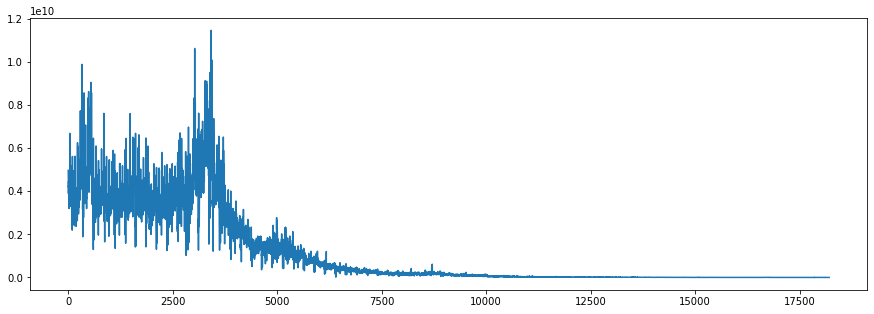

In [912]:
df_sp['Volume'].plot(figsize=(15, 5))

In [913]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18209 entries, 0 to 18208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         18209 non-null  object 
 1   Open         18209 non-null  float64
 2   High         18209 non-null  object 
 3   Low          18209 non-null  object 
 4   Close*       18209 non-null  float64
 5   Adj Close**  18209 non-null  object 
 6   Volume       18209 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.1+ MB


In [914]:
df_sp = df_sp[['Date', 'Open', 'Close*', 'Volume']]

In [915]:
df_sp.columns = ['date', 'sp_open', 'sp_close', 'sp_volume']

In [916]:
df_sp

,date,sp_open,sp_close,sp_volume
0,2022-05-12,3903.95,3930.08,4.964130e+09
1,2022-05-11,3990.08,3935.18,4.683220e+09
2,2022-05-10,4035.18,4001.05,4.630150e+09
3,2022-05-09,4081.27,3991.24,4.746120e+09
4,2022-05-06,4128.17,4123.34,4.254300e+09
...,...,...,...,...
18204,1950-01-09,17.08,17.08,2.520000e+06
18205,1950-01-06,16.98,16.98,2.010000e+06
18206,1950-01-05,16.93,16.93,2.550000e+06
18207,1950-01-04,16.85,16.85,1.890000e+06


In [919]:
df_sp['vol'] = ((df_sp['sp_close'] - df_sp['sp_open']) / df_sp['sp_open']) * 100

In [921]:
df_sp['ud'] = df_sp['vol'].apply(lambda x : 1 if x > 0 else 0 if x < 0 else np.nan)

In [922]:
df_sp.dropna(inplace=True)

In [923]:
df_sp

,date,sp_open,sp_close,sp_volume,vol_val,vol,ud
0,2022-05-12,3903.95,3930.08,4.964130e+09,0.669322,0.669322,1.0
1,2022-05-11,3990.08,3935.18,4.683220e+09,-1.375912,-1.375912,0.0
2,2022-05-10,4035.18,4001.05,4.630150e+09,-0.845811,-0.845811,0.0
3,2022-05-09,4081.27,3991.24,4.746120e+09,-2.205931,-2.205931,0.0
4,2022-05-06,4128.17,4123.34,4.254300e+09,-0.117001,-0.117001,0.0
...,...,...,...,...,...,...,...
15191,1962-01-08,0.00,69.12,4.620000e+06,inf,inf,1.0
15192,1962-01-05,0.00,69.66,4.630000e+06,inf,inf,1.0
15193,1962-01-04,0.00,70.64,4.450000e+06,inf,inf,1.0
15194,1962-01-03,0.00,71.13,3.590000e+06,inf,inf,1.0


In [924]:
df_sp['sp_open'] = df_sp['sp_open'].apply(lambda x: x if x > 0 else np.nan)

In [925]:
df_sp.dropna(inplace=True)

In [940]:
df_sp = df_sp[['date', 'vol', 'ud']]

In [945]:
df_sp.ud = df_sp.ud.astype('int')

C:\Users\bitcamp\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [948]:
df_sp.columns = ['date', 'sp_volatility', 'sp_updown']

In [937]:
df_con = df_con[['doller', 'sp_close', 'sp_volume', 'mi_close', 'mi_volume',
       'gsci_close', 'fed', 'gdp', 'cpi', 'unem', 'infl']]

In [951]:
df_mer = pd.merge(df_con, df_sp, on='date', how='inner')

In [955]:
# df_mer.to_csv('data_files/82~전처리후.csv')

In [1063]:
df = pd.read_csv('data_files/pmi 50~.csv')

In [1064]:
df_base = pd.read_csv('data_files/재전처리.csv', index_col='Unnamed: 0')

In [1066]:
df.Date = df.Date.apply(lambda x: x[:-3])

In [1088]:
pmi_li = []
for date in df_rate.date:
    pmi_li.append(df[df.Date == date[:-3]].PMI.values[0])

In [1089]:
pmi_li

[59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.7,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 59.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 61.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 60.6,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 63.7,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,
 60.9,

In [1068]:
df_base['pmi'] = pmi_li

In [1077]:
df[df.Date == '1982-04']

,Date,PMI
479,1982-04,37.8


In [1092]:
last_pmi = fill_zero(calcul_last_value(pmi_li), 37.8)

In [1082]:
df_rate = df_mer

In [1099]:
df_rate.pmi = ((pd.Series(pmi_li) - last_pmi) / last_pmi) * 100

In [1110]:
# df_rate.to_csv('data_files/82~전처리후.csv')

In [1111]:
# df_base.to_csv('data_files/재전처리.csv')